In [1]:
import re
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def list_folders_in_directory(directory: str) -> list:
    # Get a list of all items in the directory
    all_items = os.listdir(directory)

    # Filter out only directories
    folders = [item for item in all_items if os.path.isdir(os.path.join(directory, item)) and "User" in item]

    return folders

In [3]:
folders = list_folders_in_directory('dataset')

In [4]:
def extract_experiment_id(filename):
    """
    it takes in a string like 123Datafile_Gyroscope and returns the experiment id "123"
    """
    match = re.match(r'(\d+)', filename)
    if match:
        return match.group(1)
    return None

In [10]:
import json

def get_activity_id_from_experiment_id(experiment_id: str) -> int:
    """
    The function takes in a string (experiment_id),
    and returns activity ID

    It reads a json file called data.json on dataset directory and extracts activity_no for a given experiment_id
    """


    with open('dataset/data.json', 'r') as file:
        experiment_to_activity_json = json.load(file) 

    return experiment_to_activity_json[experiment_id]

def get_activity_details_from_activity_id(activity_id: str):
    """
    The function takes in activity_id and returns a dictionary containing activity and details

    Example:
    get_activity_details_from_activity_id('1') -> {'activity': 'Sitting', 'details': 'Reading a book'}
    """
    with open('dataset/activity_details.json', 'r') as file:
        activity_details = json.load(file)

    return activity_details[activity_id]

In [11]:
def get_files_grouped_by_experiment(userId: str):
    """
    The function takes in a string userId and returns a dictionary of dictionary.

    The output is in the following structure
    {
        "133": {
            "accelerometer": "filename.csv",
            "gyroscope": "filename.csv"
        }
    }
    """
    all_files = os.listdir(f"dataset/{userId}")

    experiment_files = {}

    for file in all_files:
        sensor_type = ""
        if 'Accelerometer' in file:
            sensor_type = 'accelerometer'
        elif 'Gyroscope' in file:
            sensor_type = 'gyroscope'
        elif 'Magnetometer' in file:
            sensor_type = 'magnetometer'
        elif 'Pressure' in file:
            sensor_type = 'pressure'
        else:
            continue

        experiment_id = extract_experiment_id(file)

        if not experiment_id:
            continue

        if not experiment_files.get(experiment_id):
            experiment_files[experiment_id] = {}
        experiment_files[experiment_id][sensor_type] = file

    return experiment_files

In [12]:
import os.path

def does_file_exist(file_name: str) -> bool:
   return os.path.isfile(file_name) 

In [17]:
# Visualization

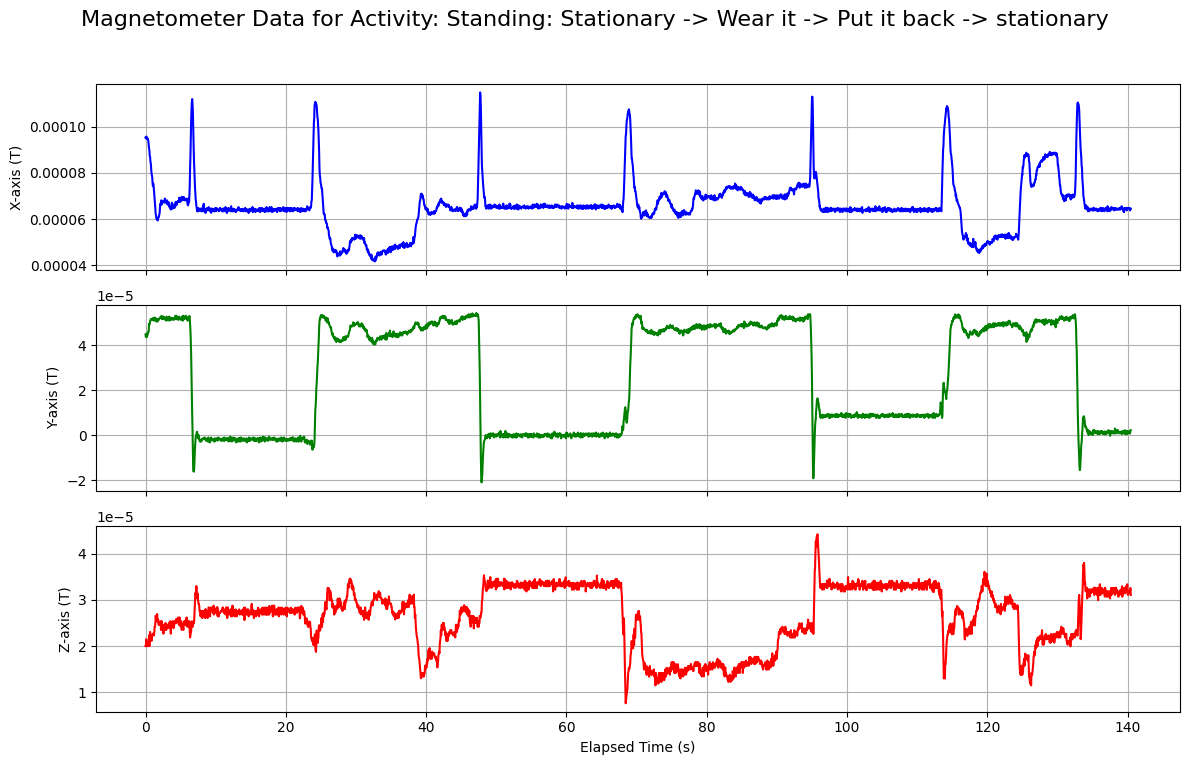

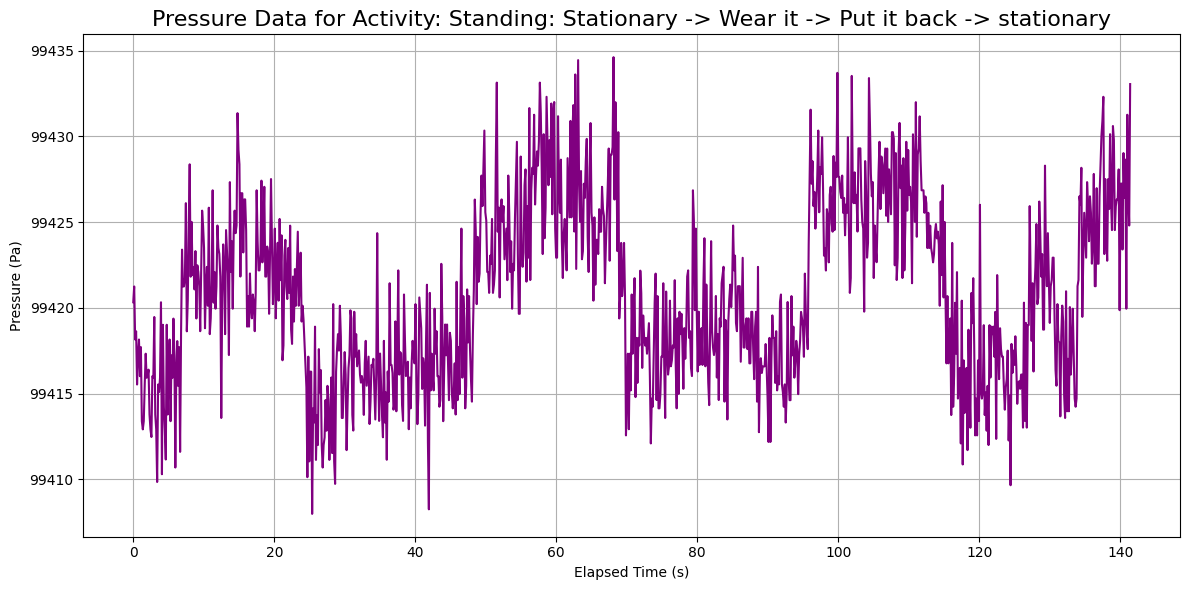

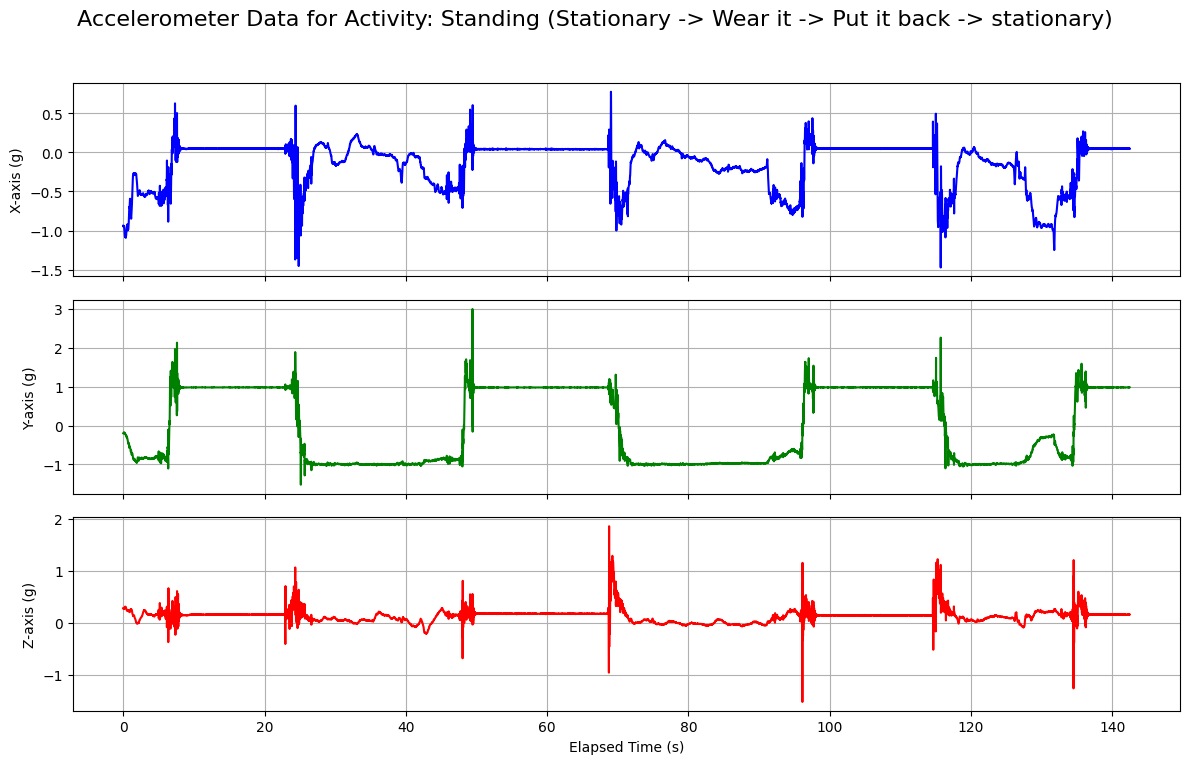

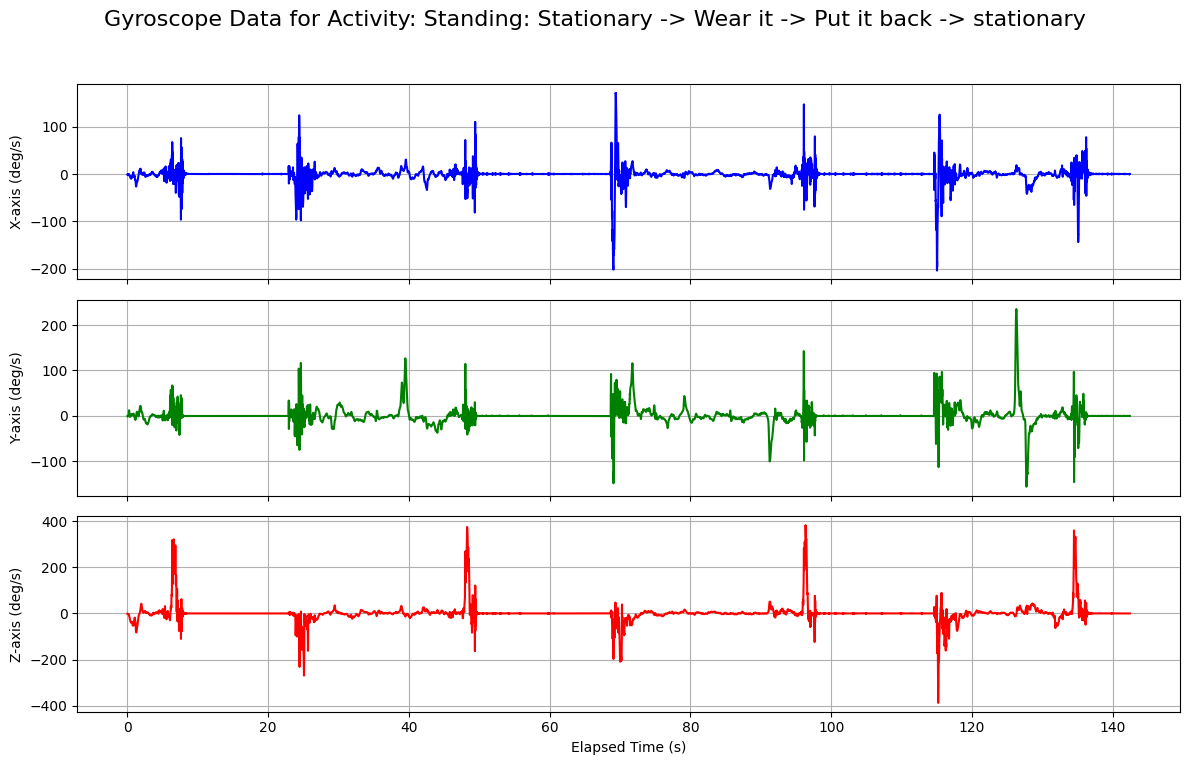

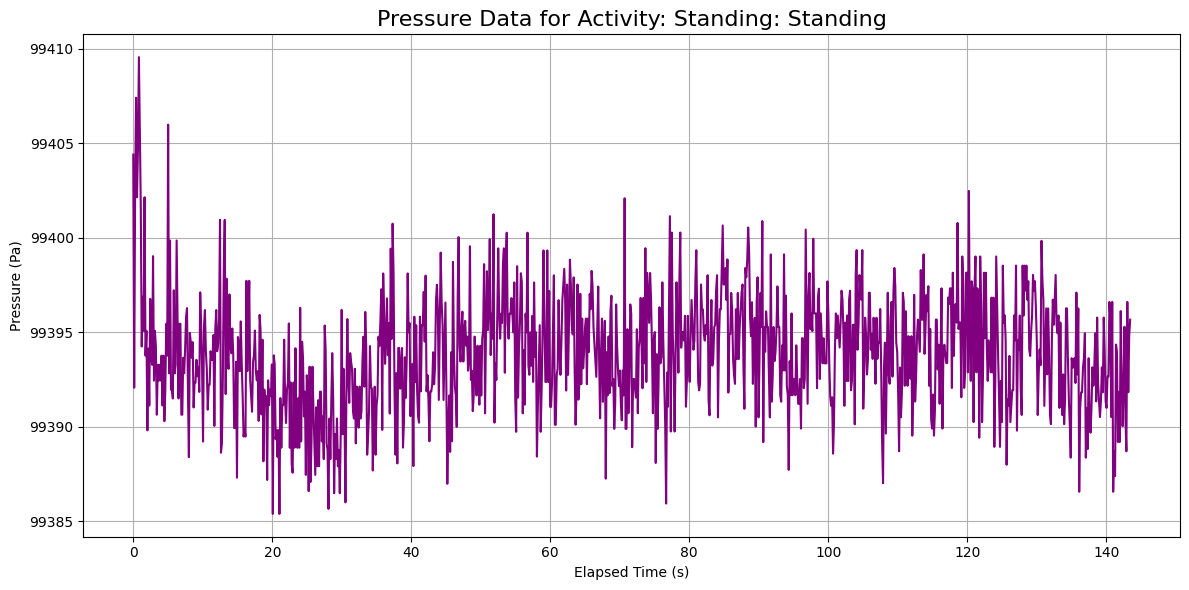

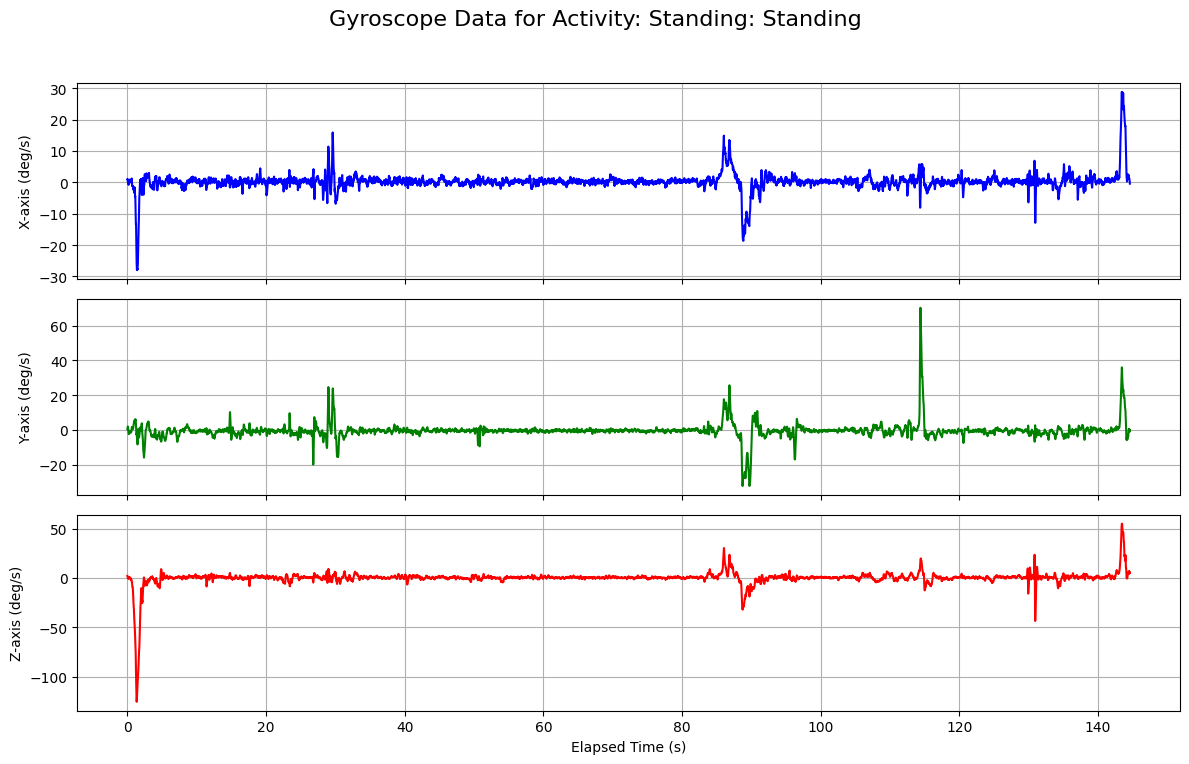

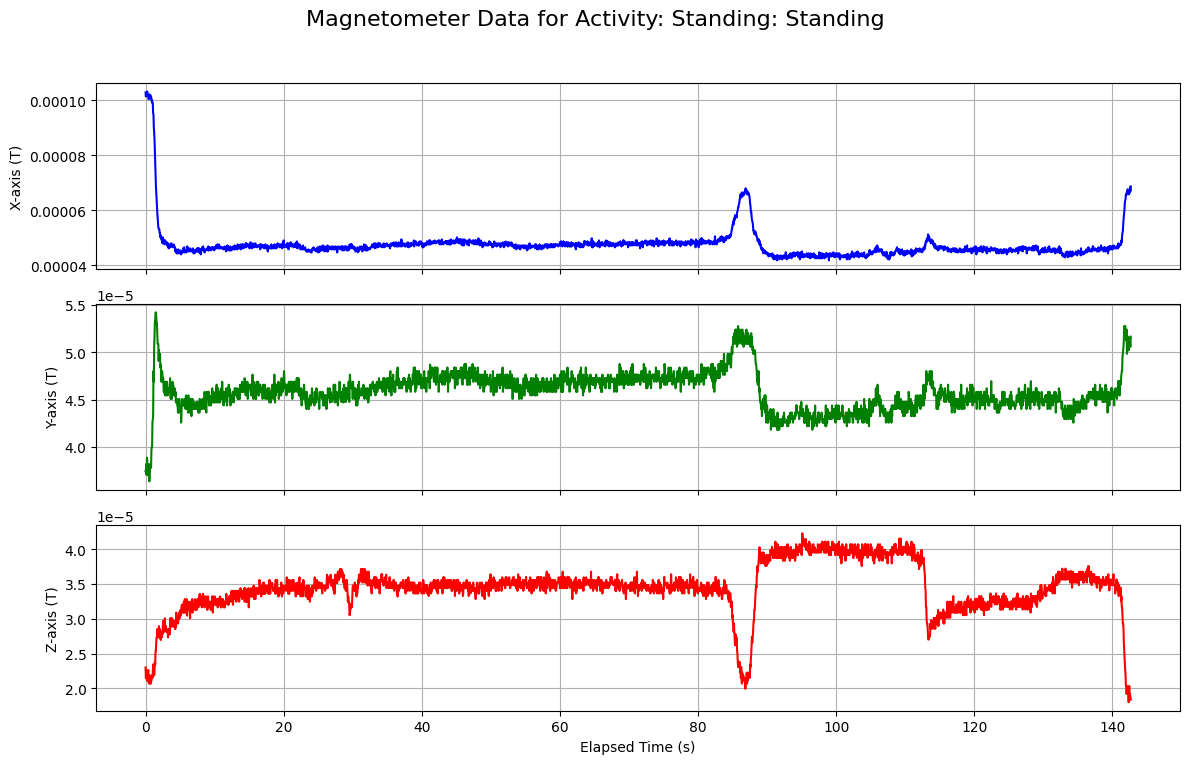

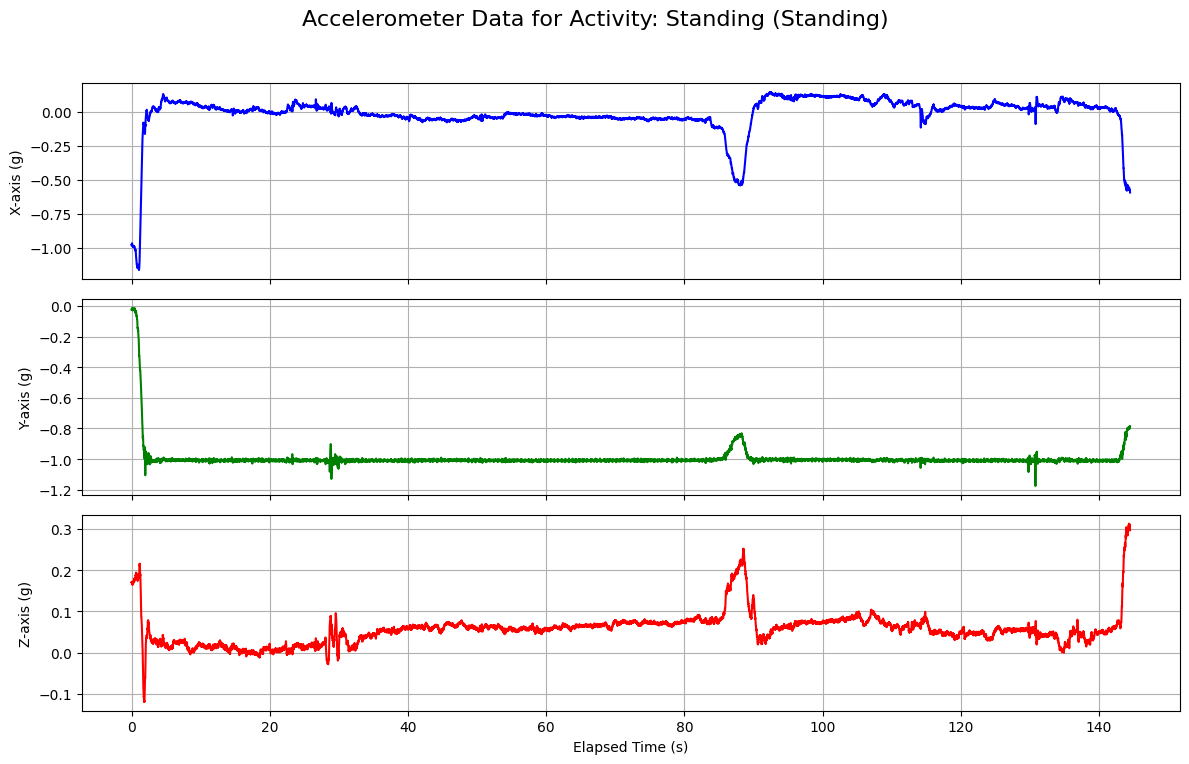

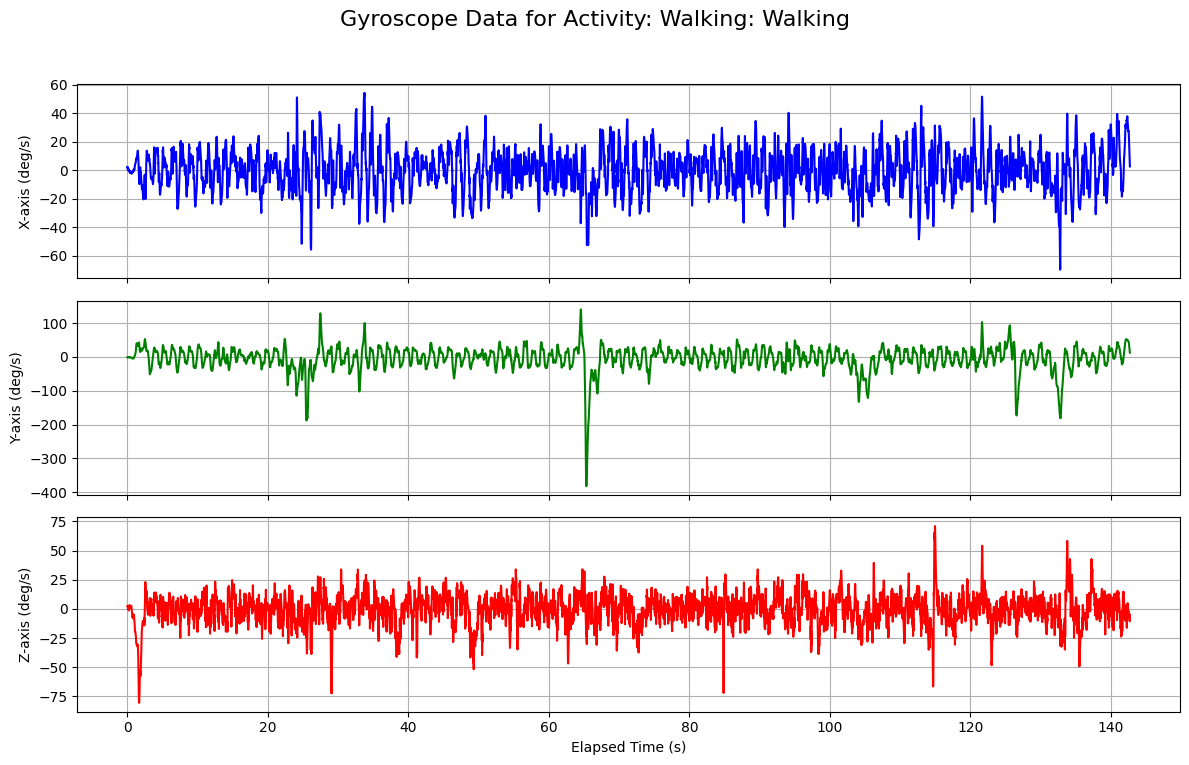

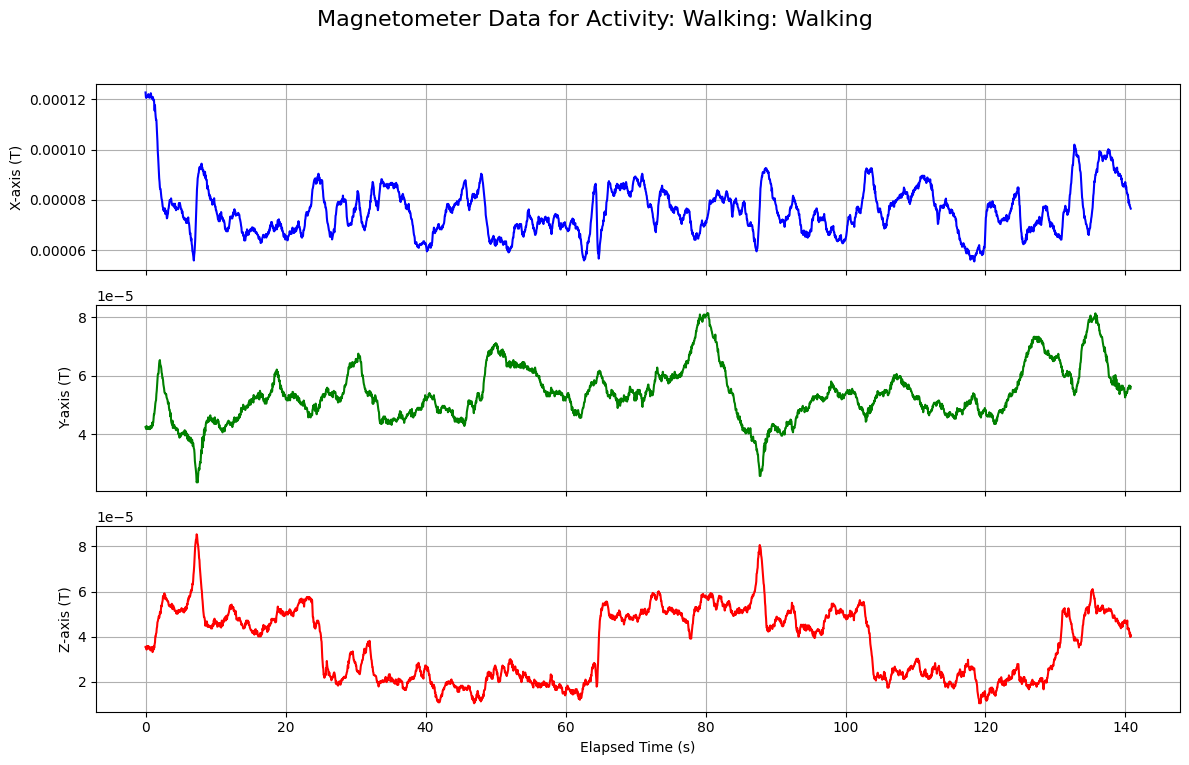

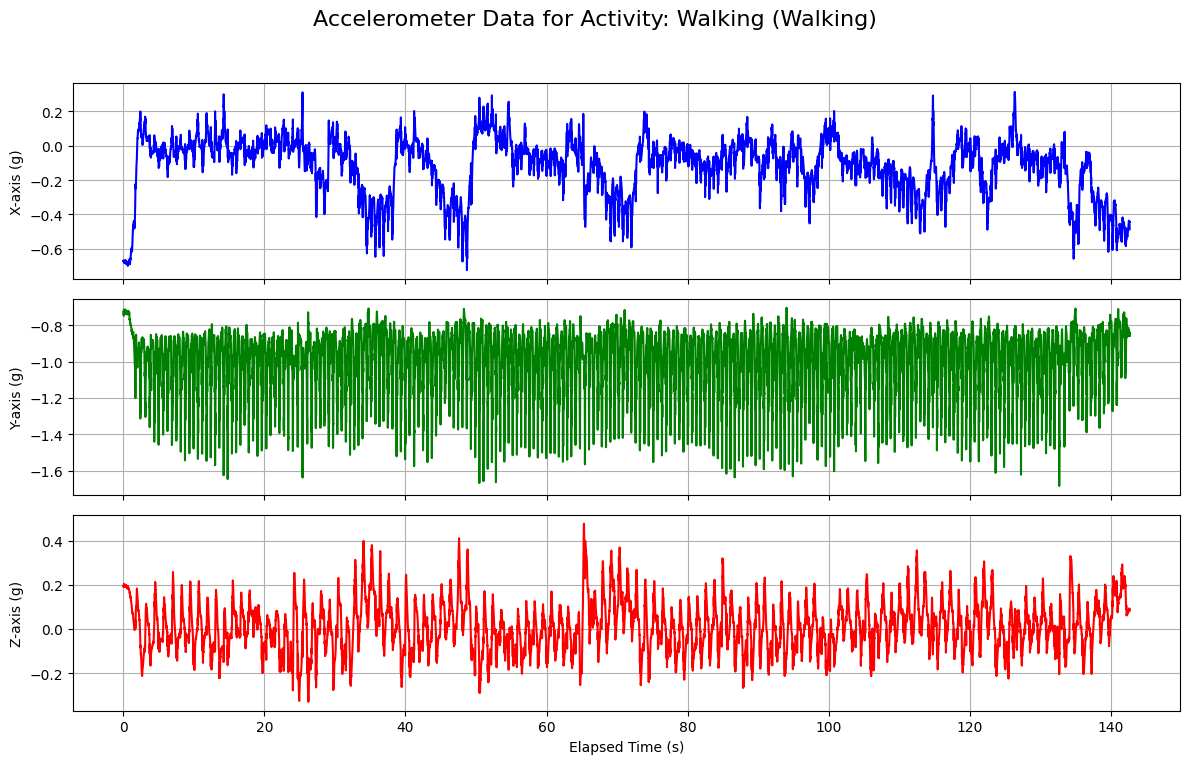

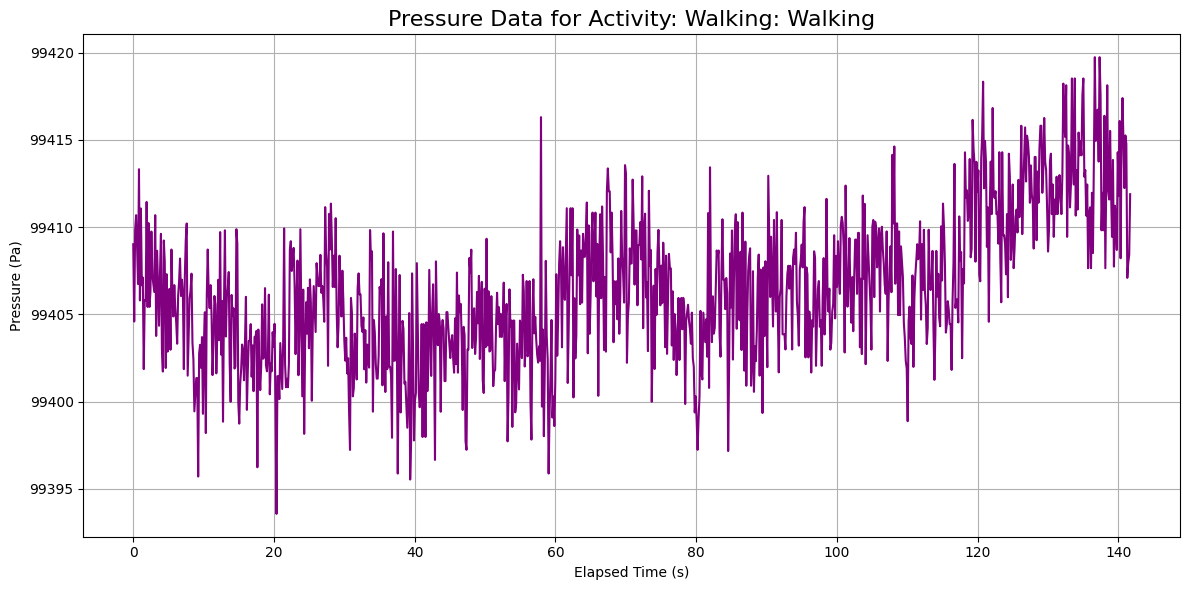

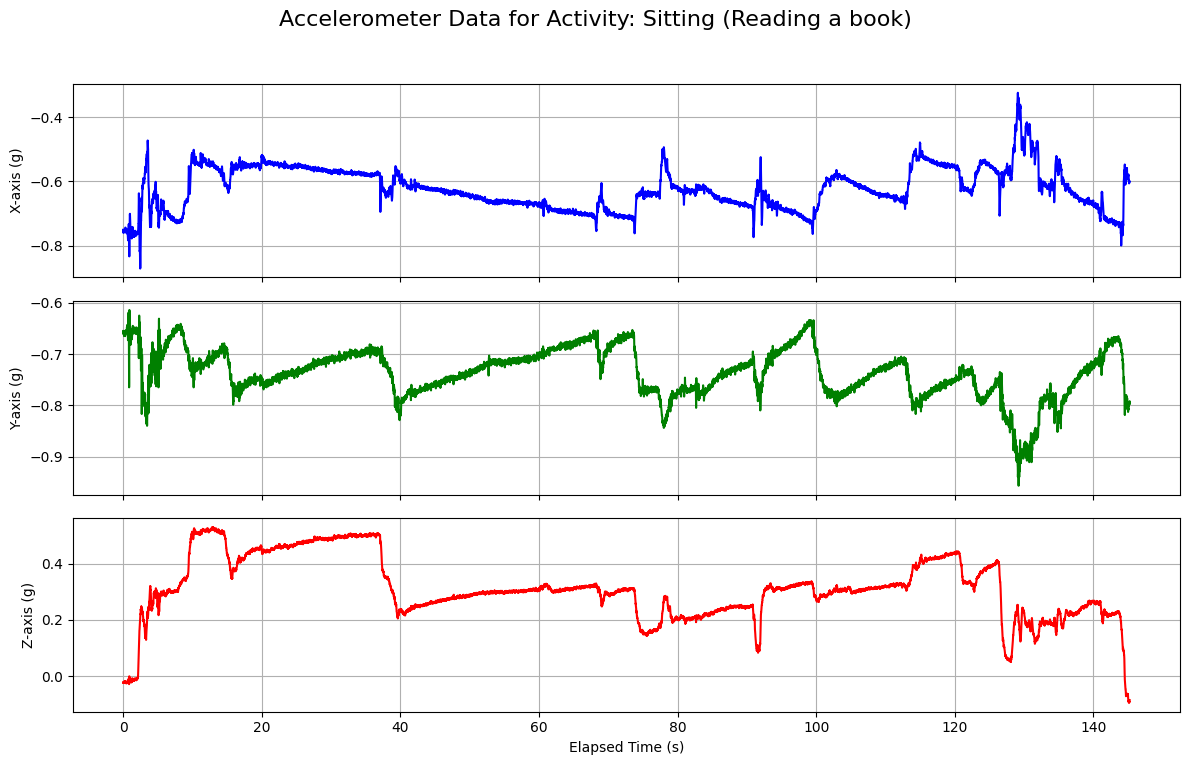

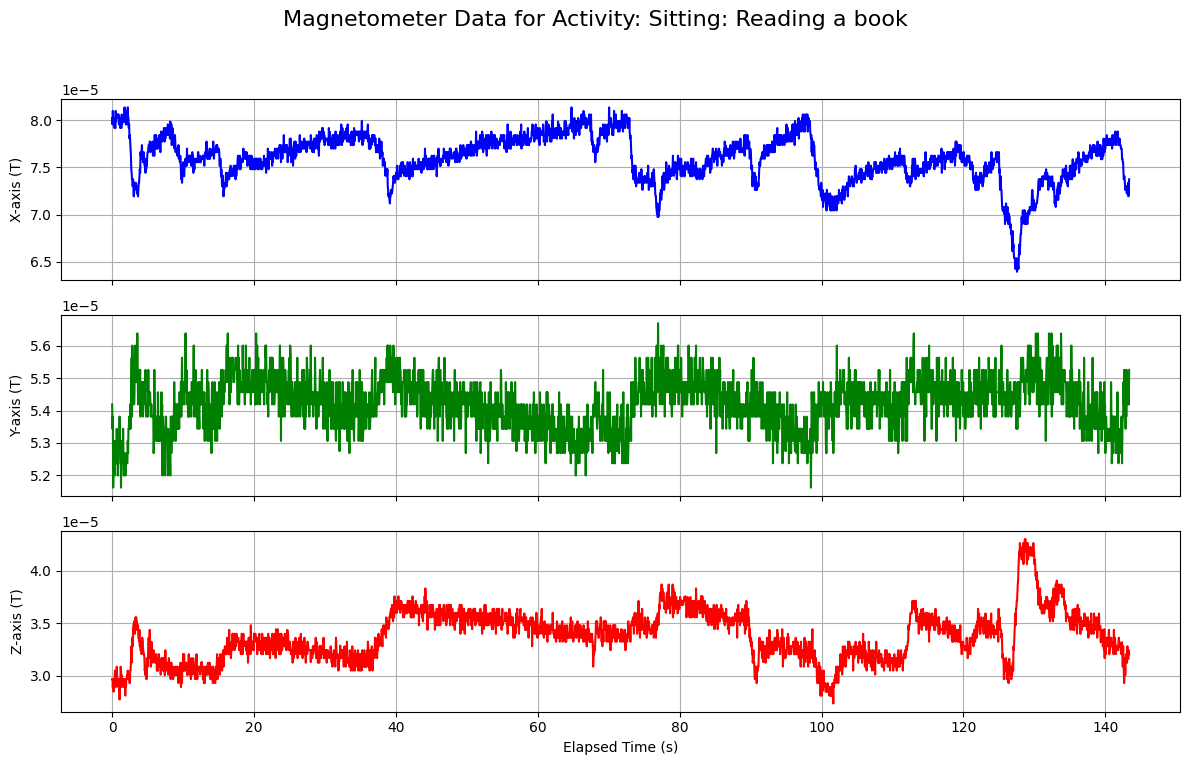

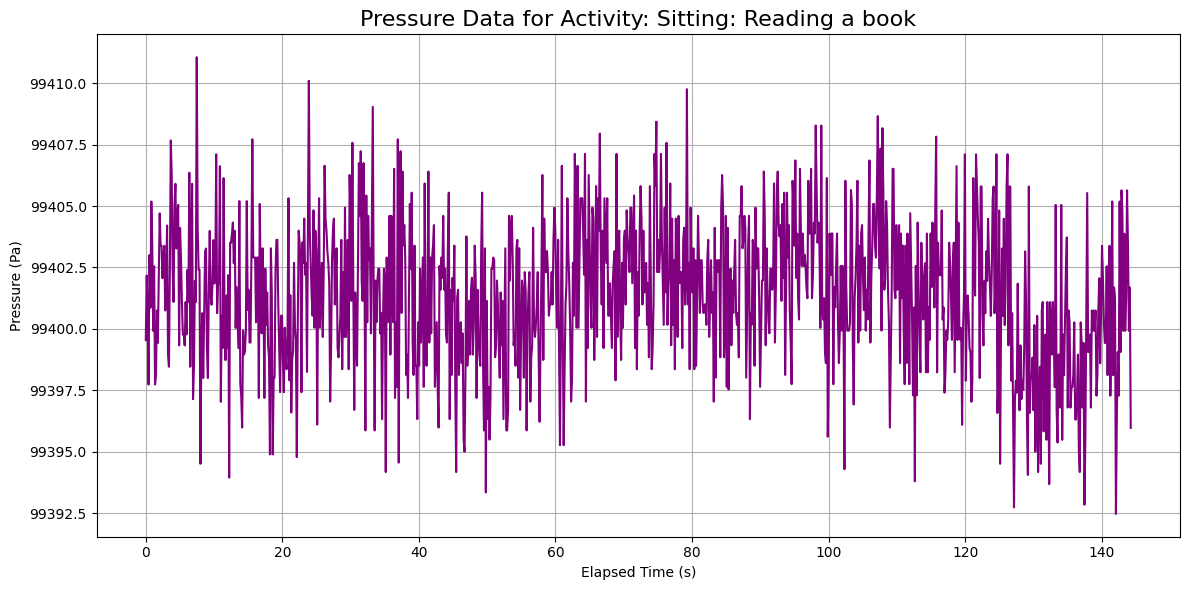

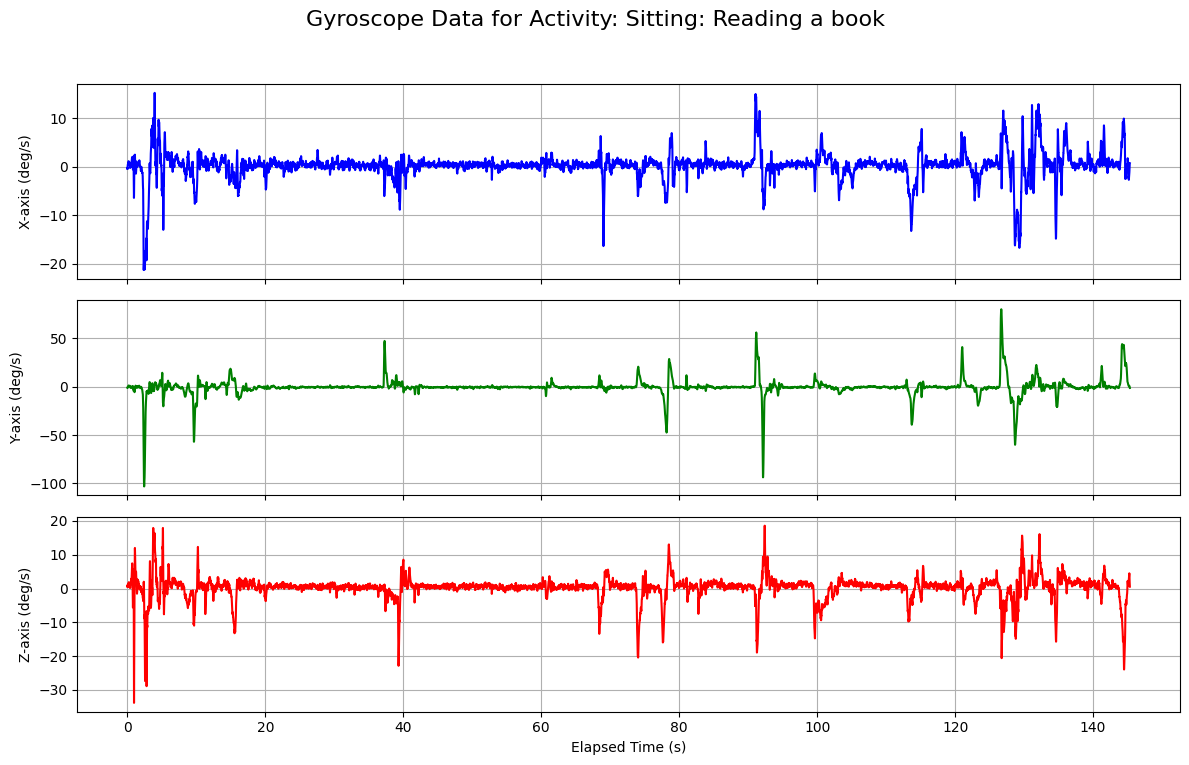

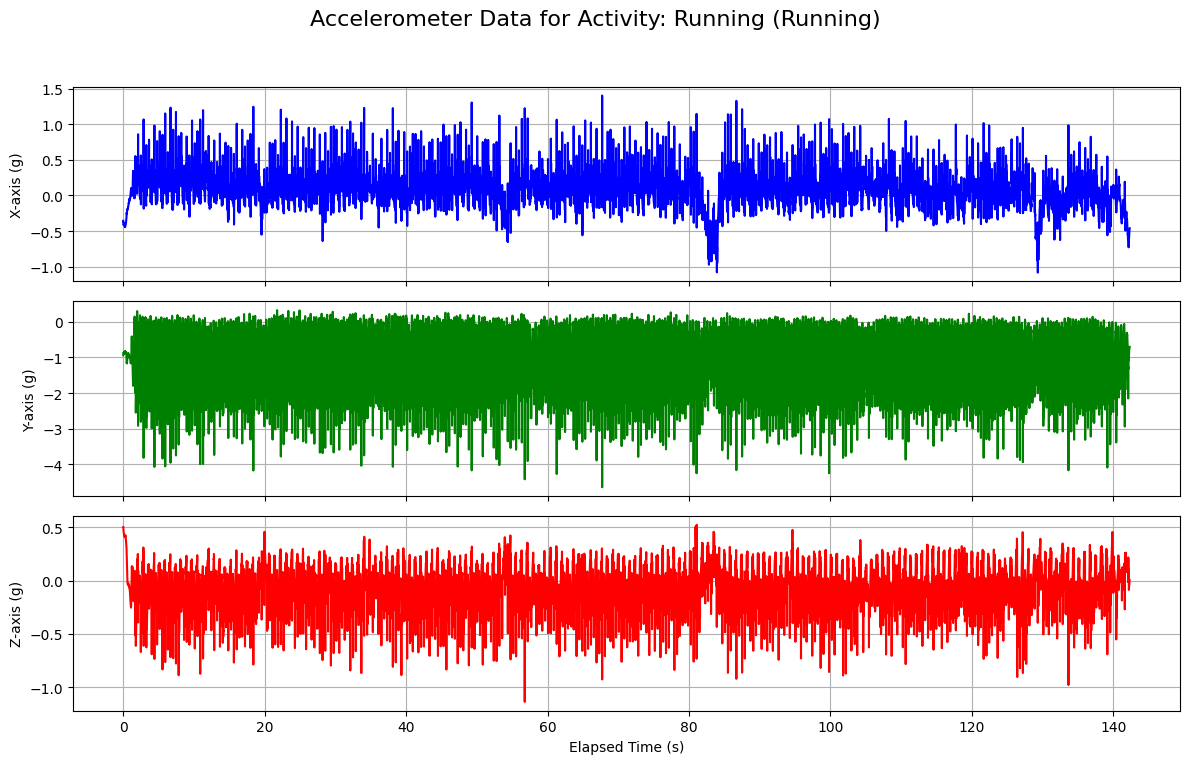

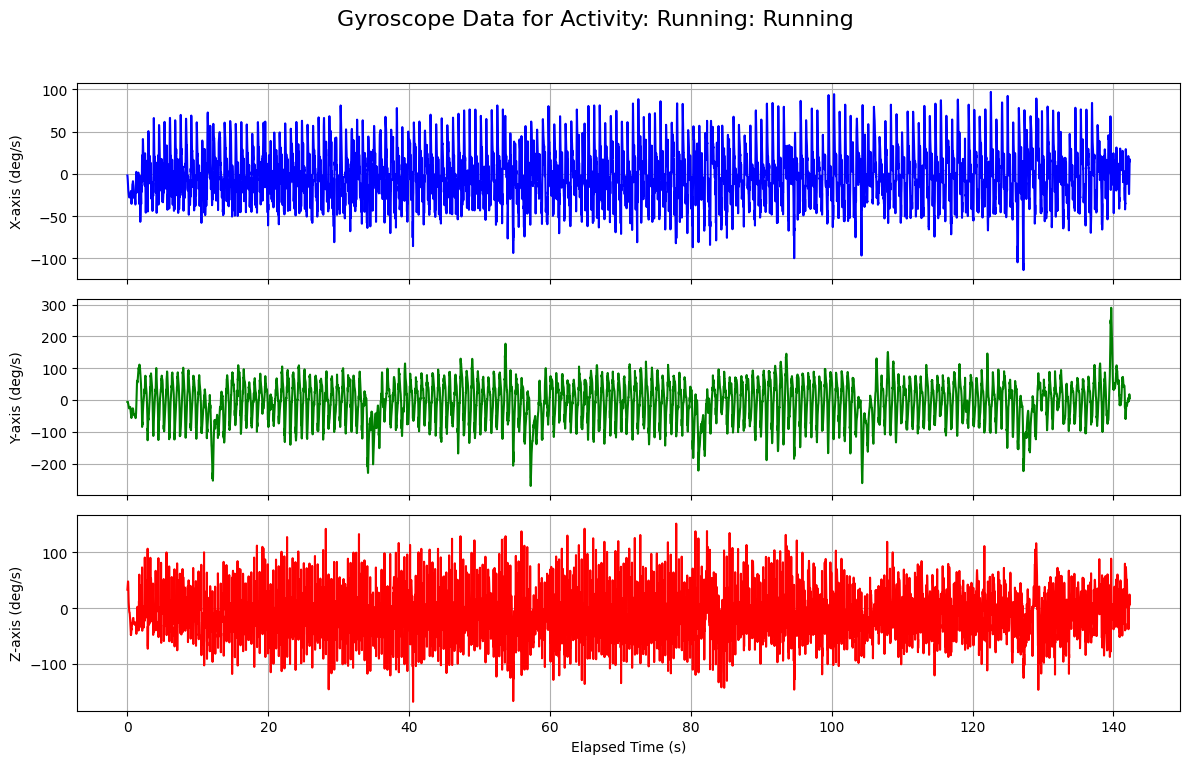

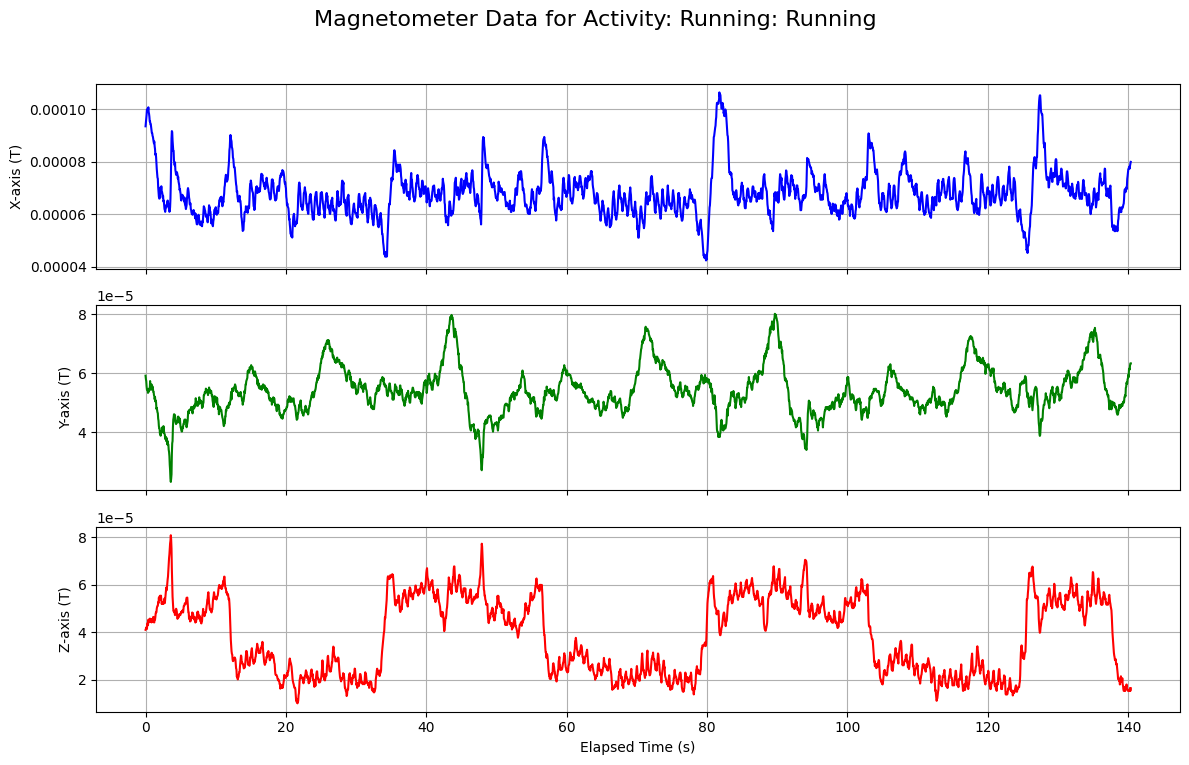

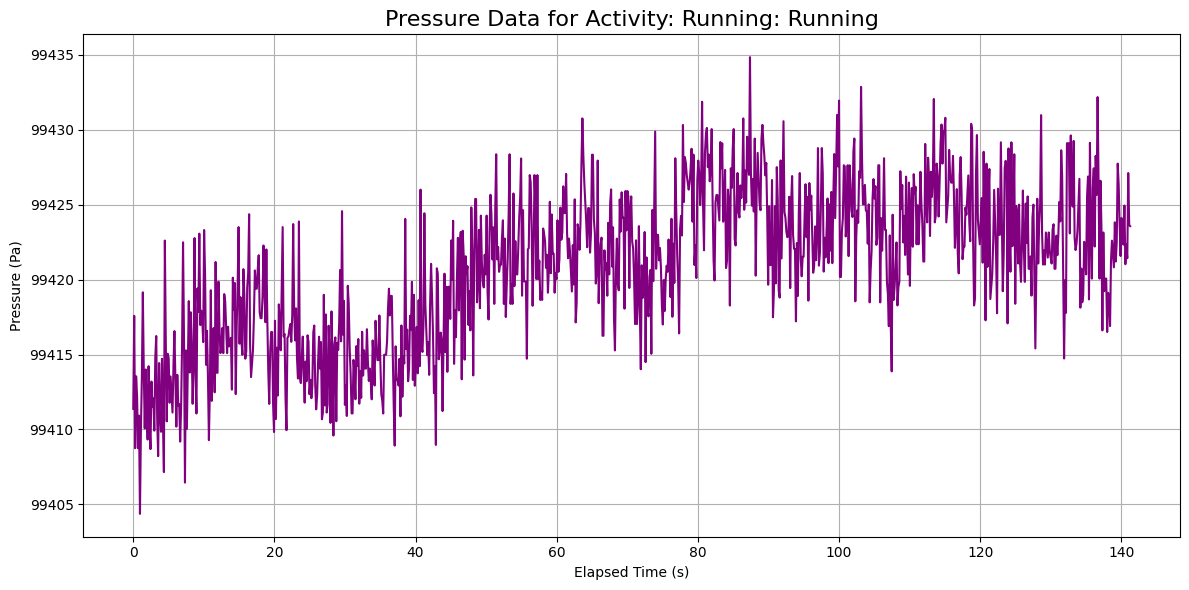

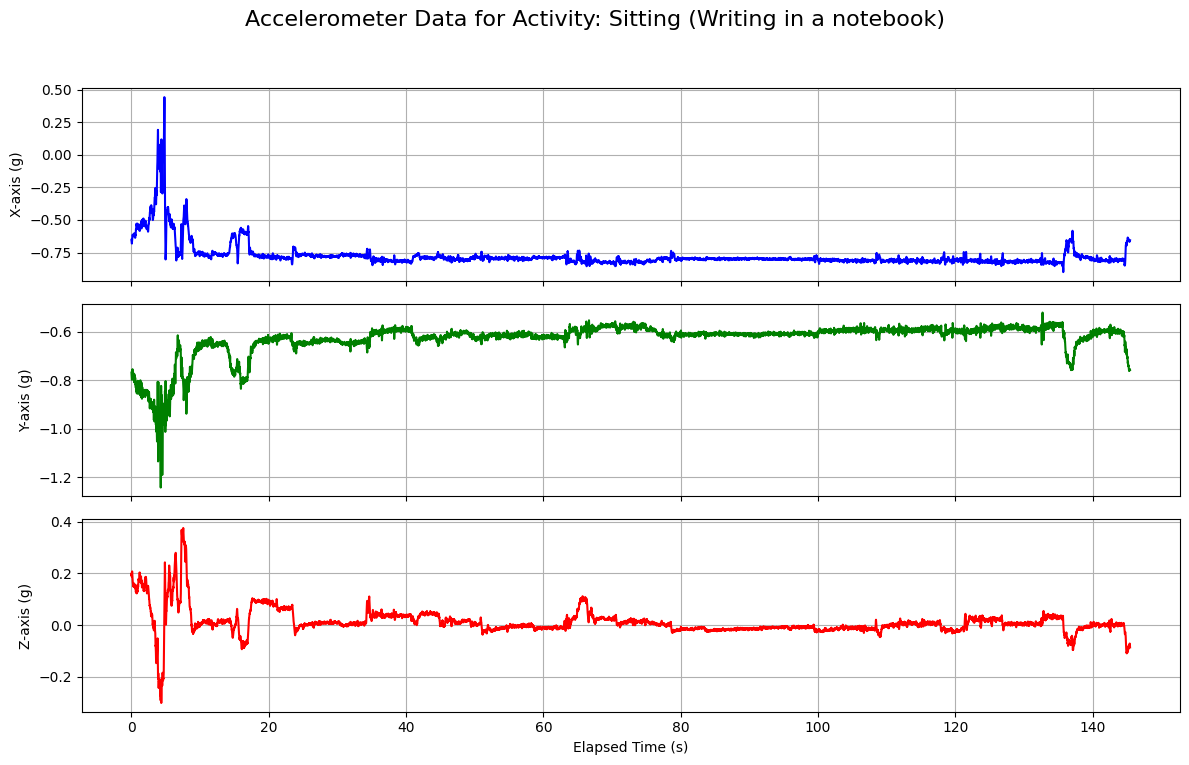

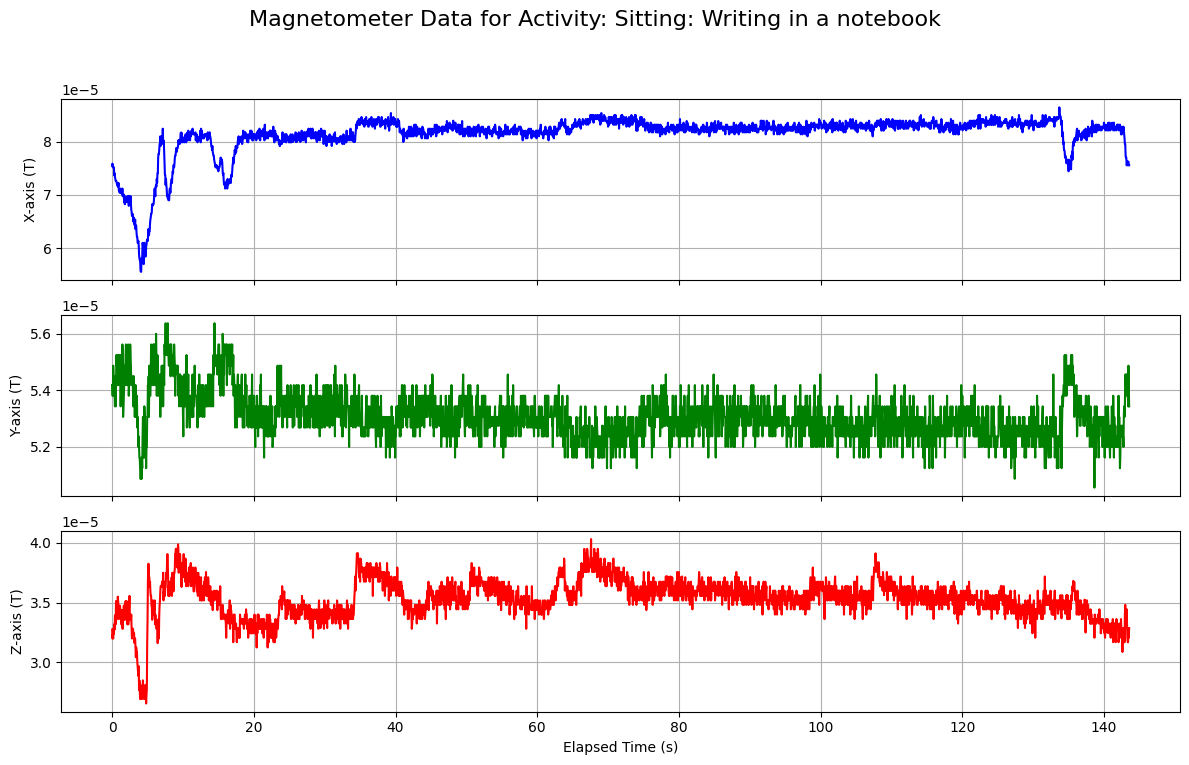

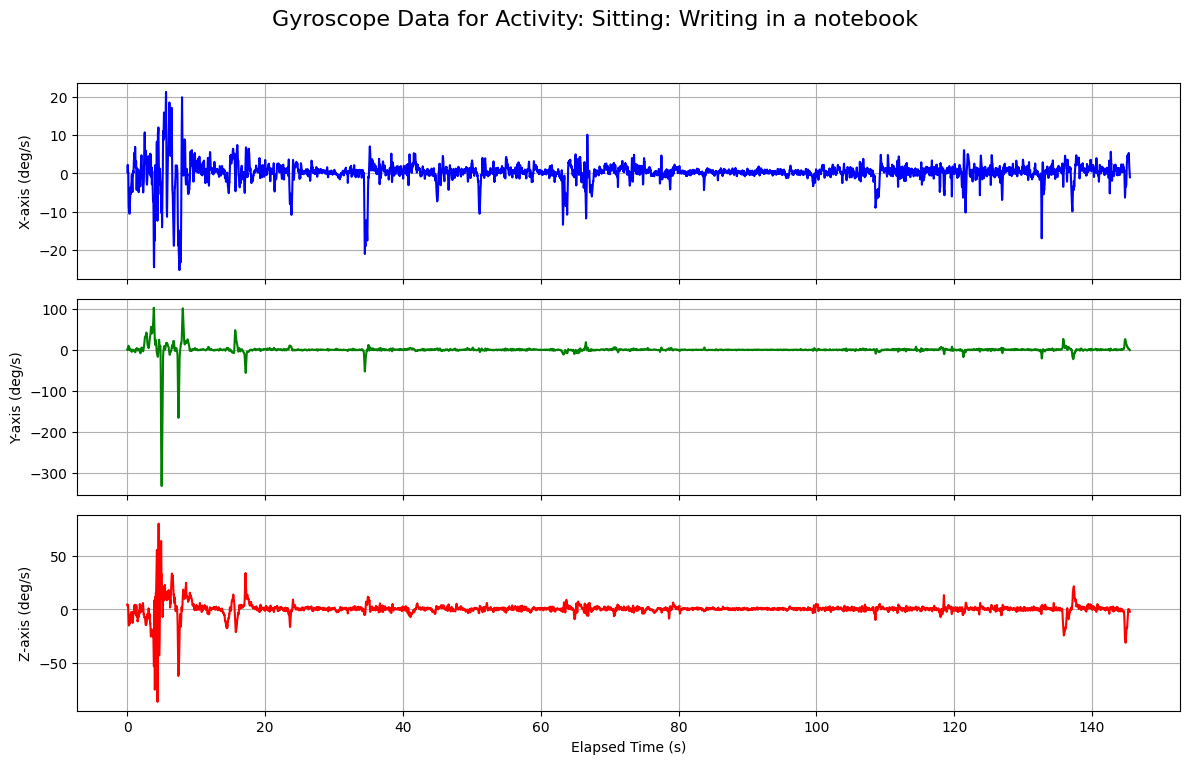

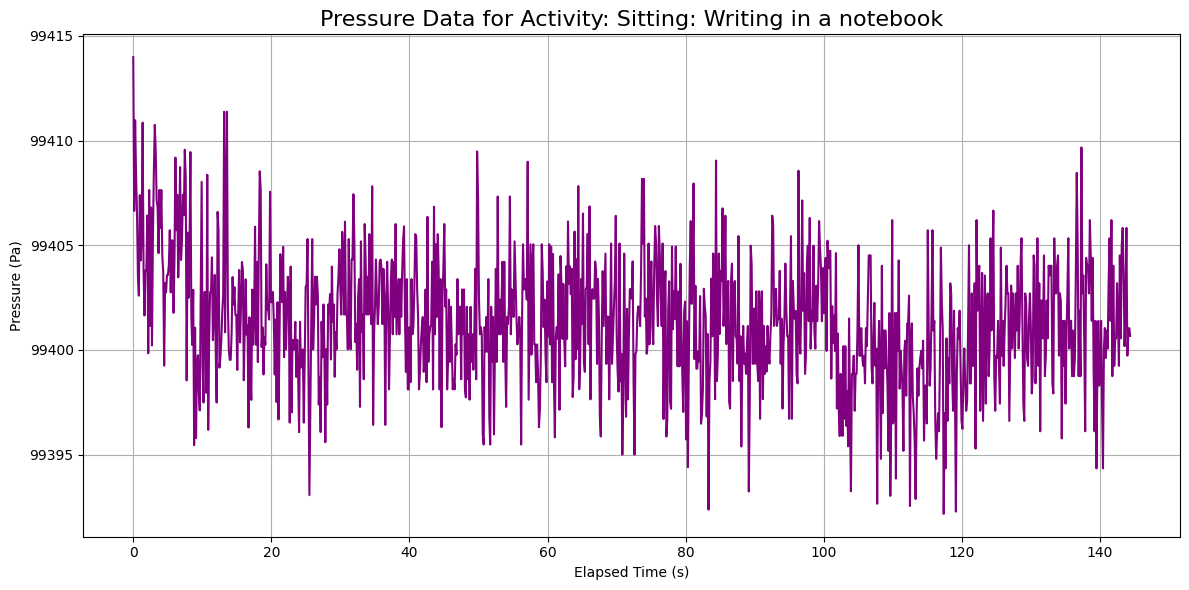

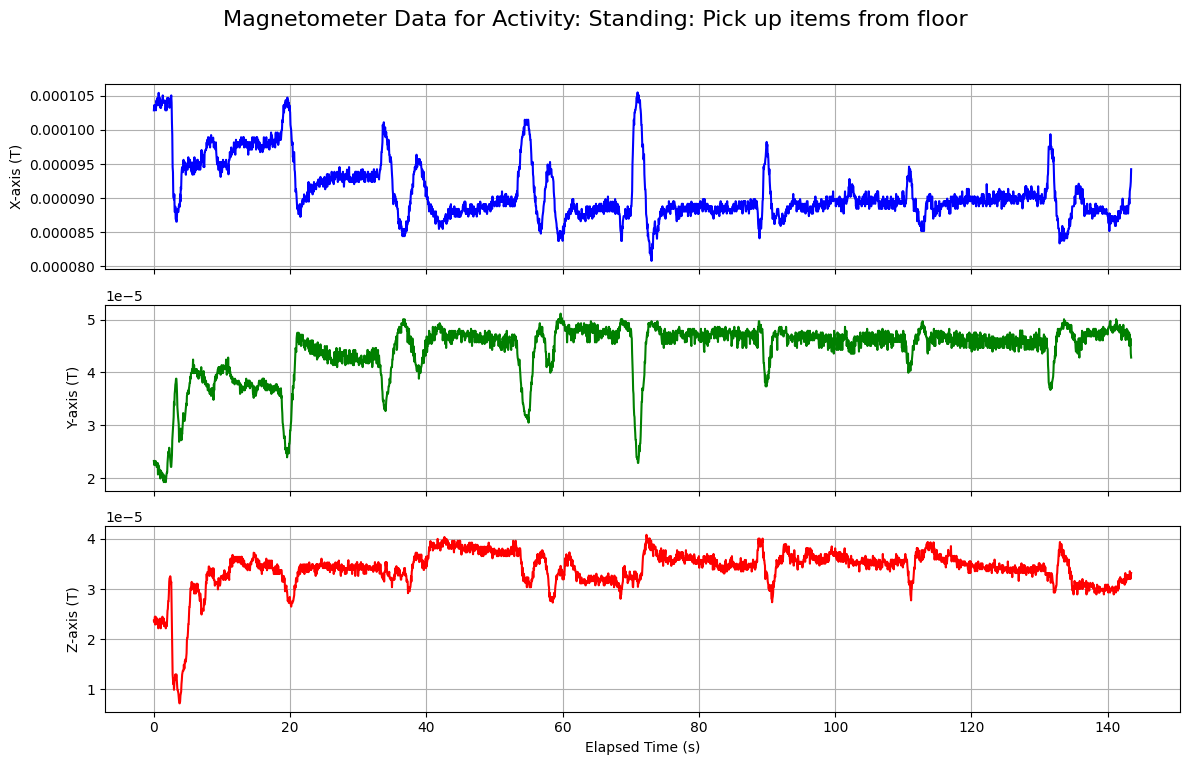

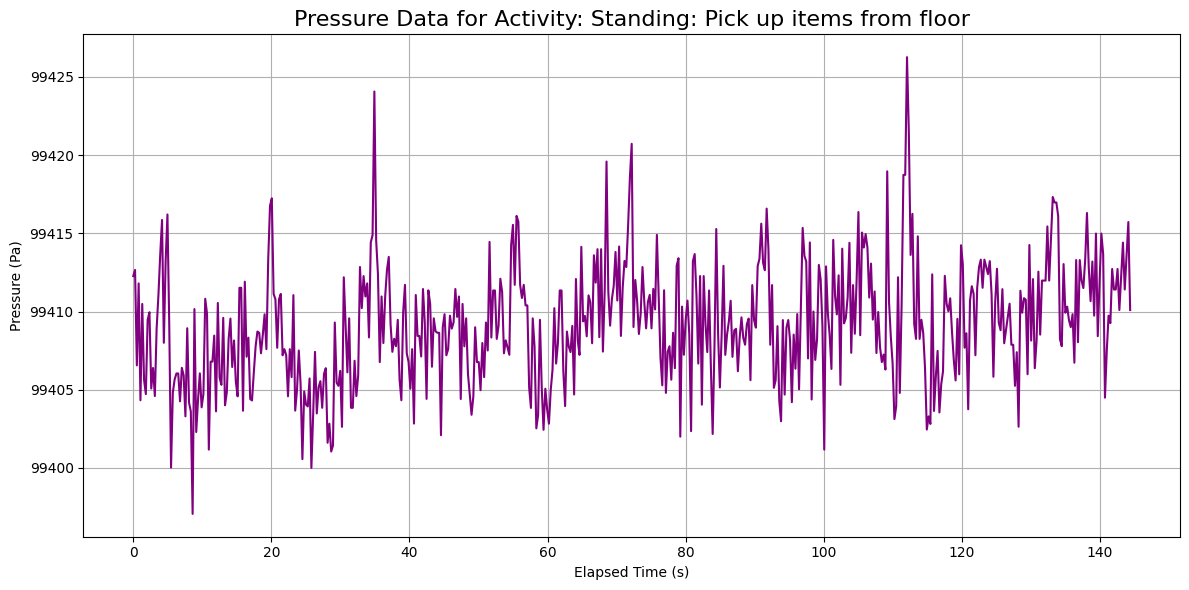

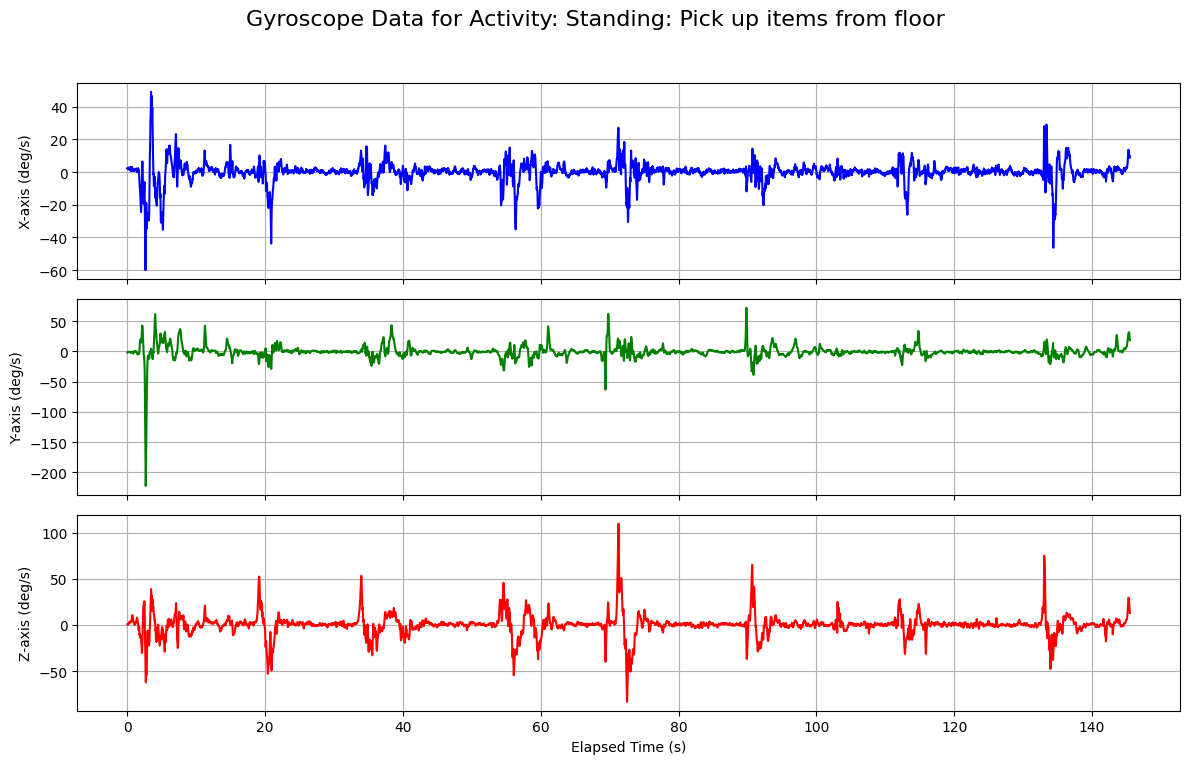

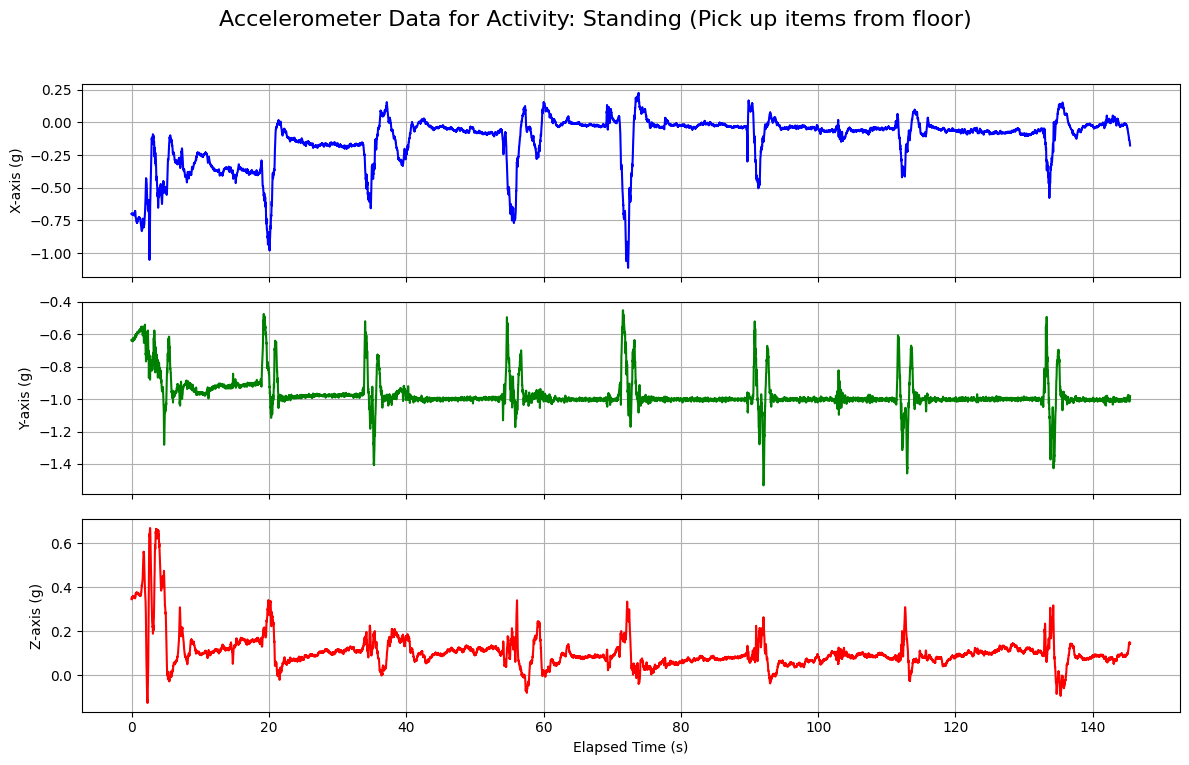

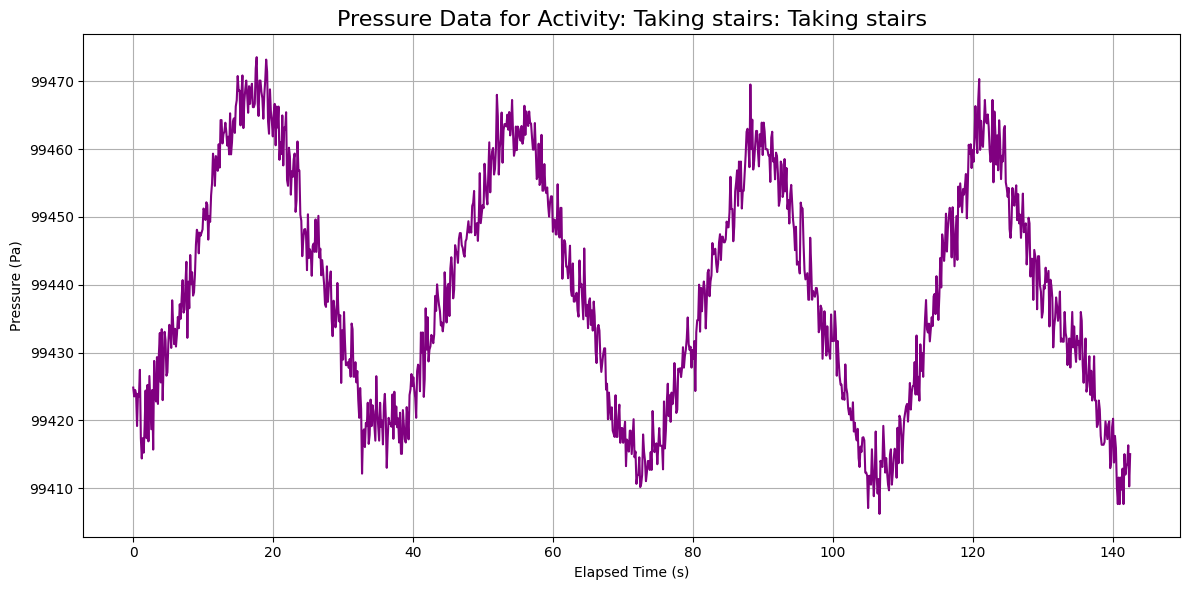

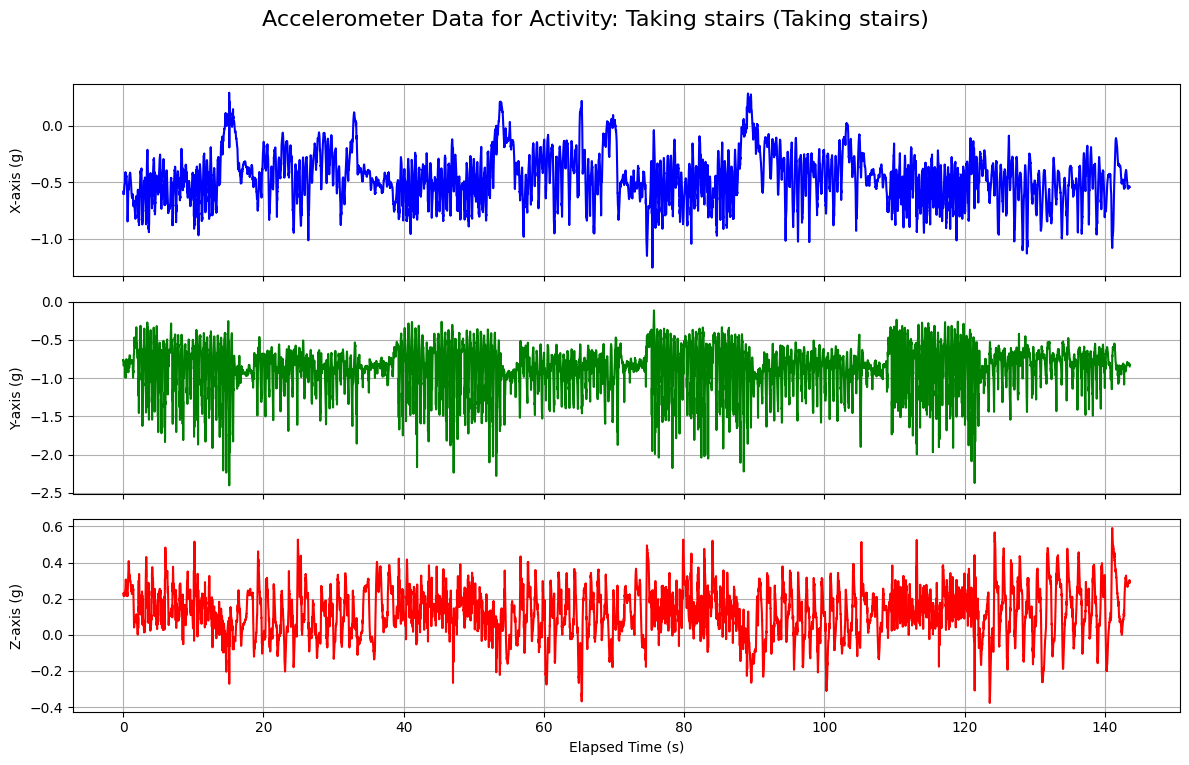

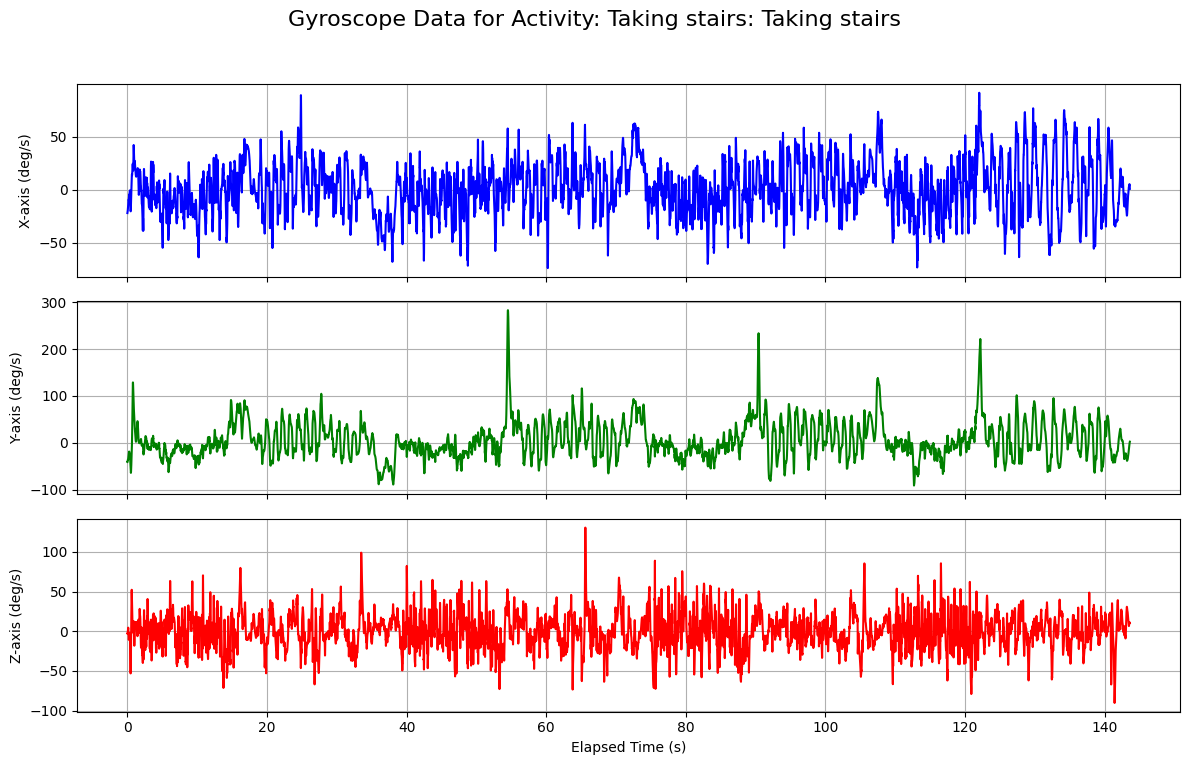

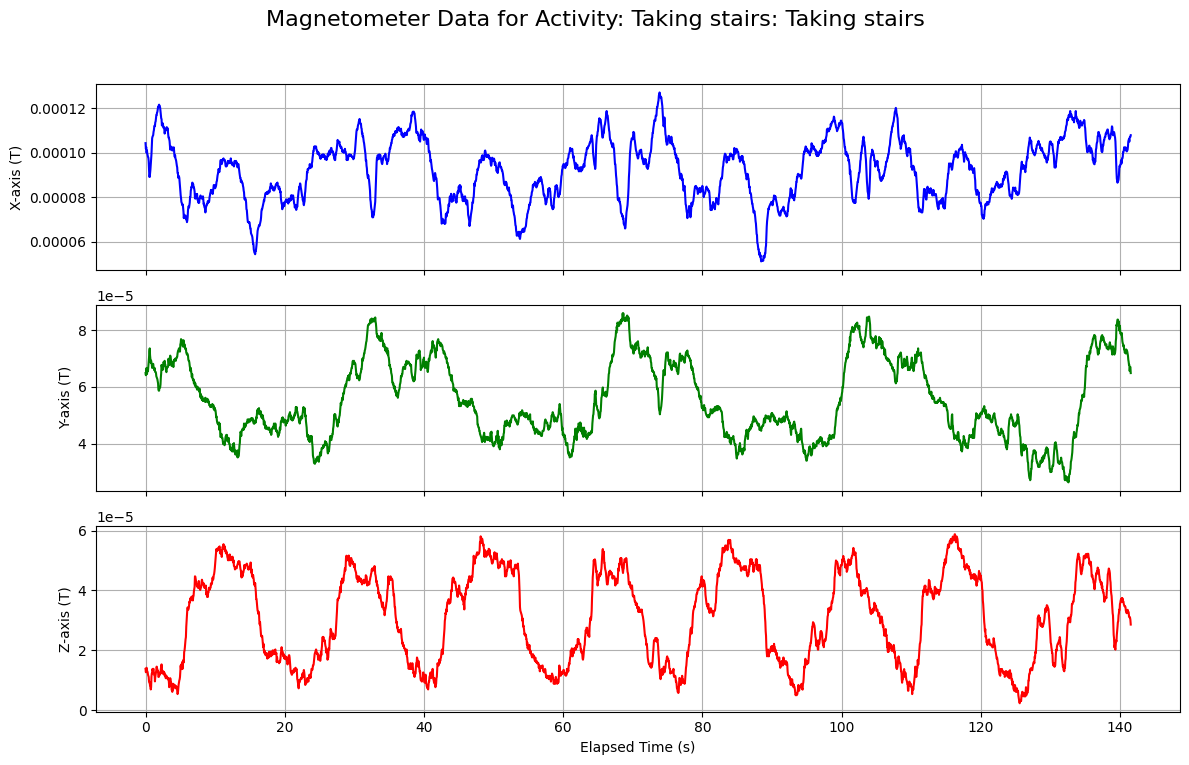

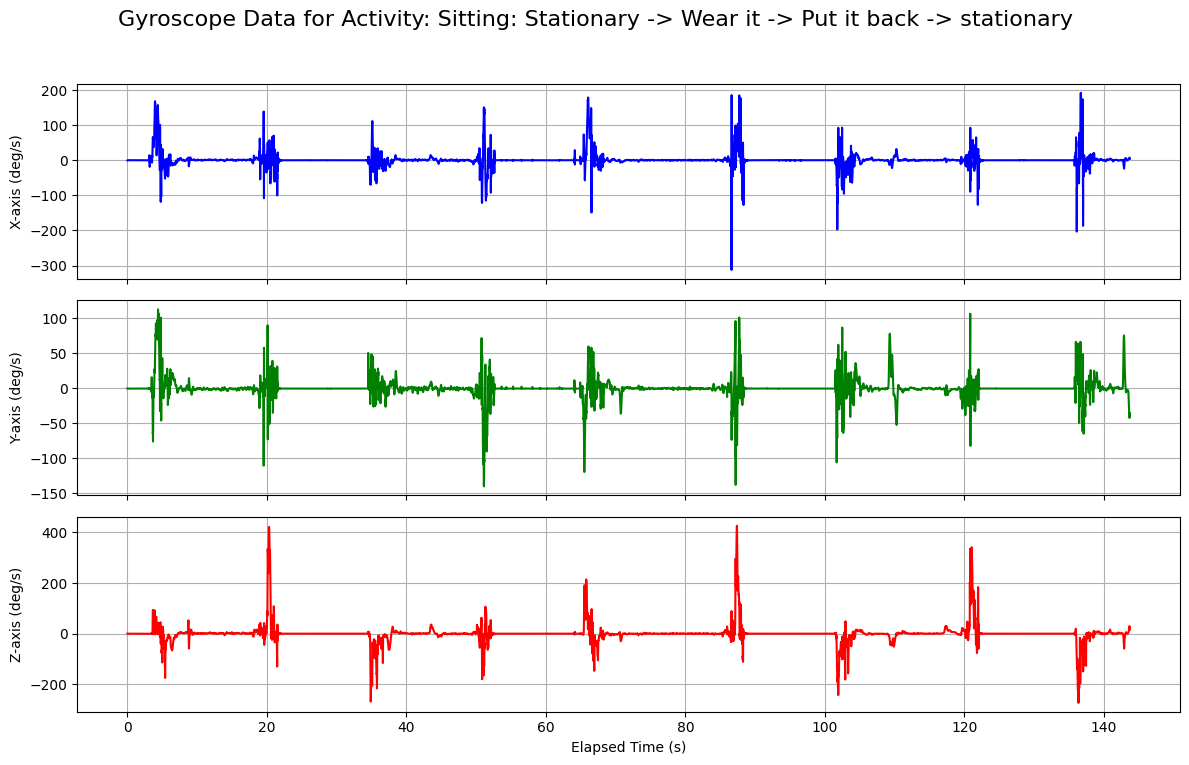

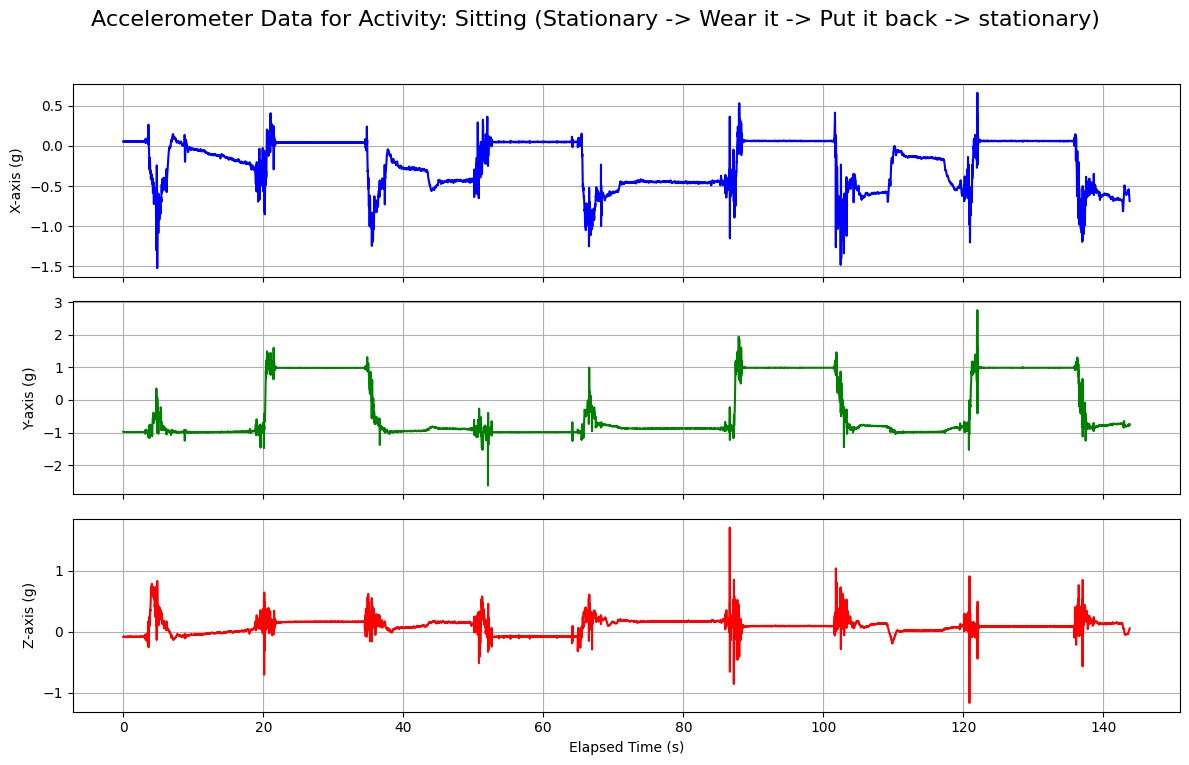

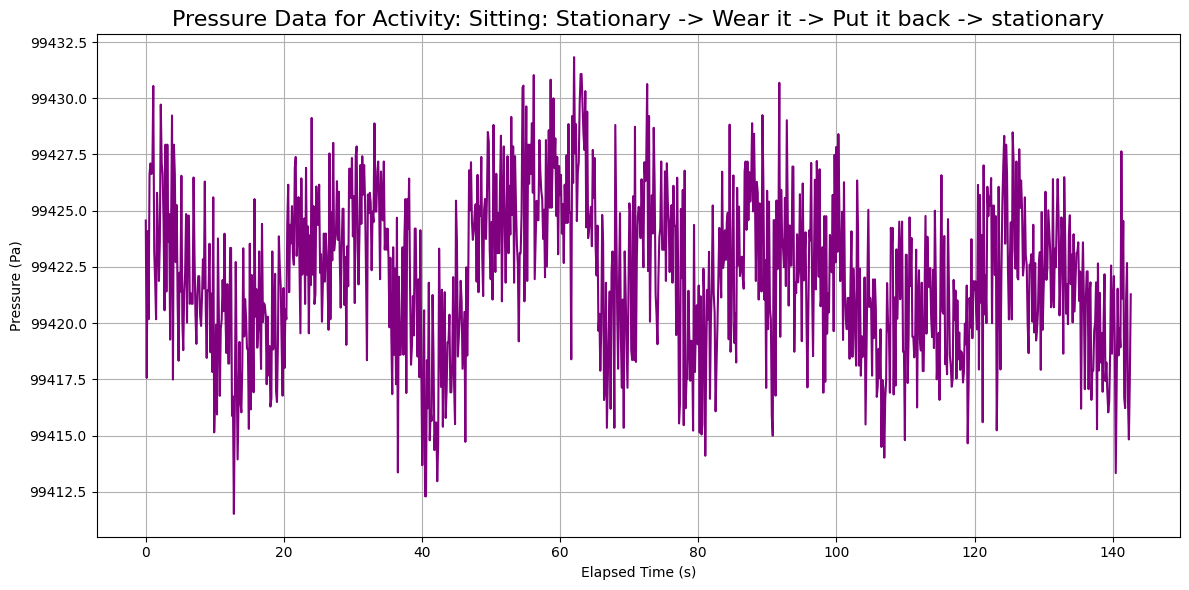

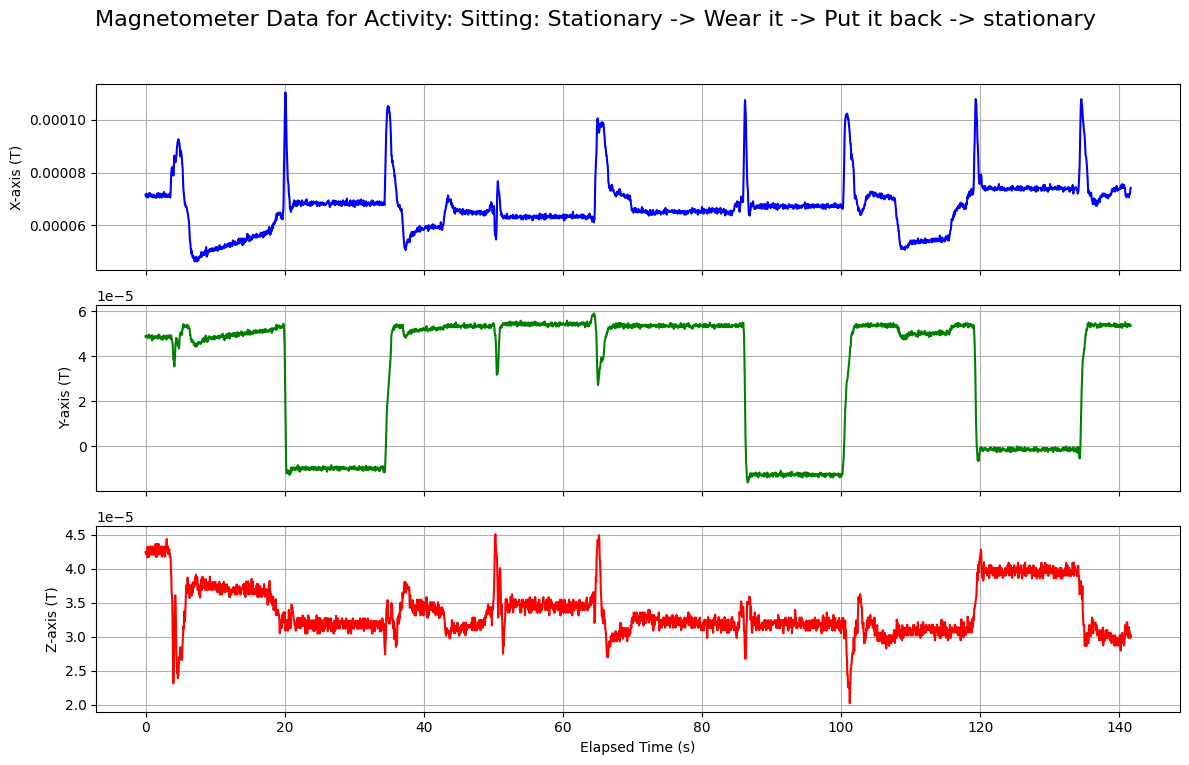

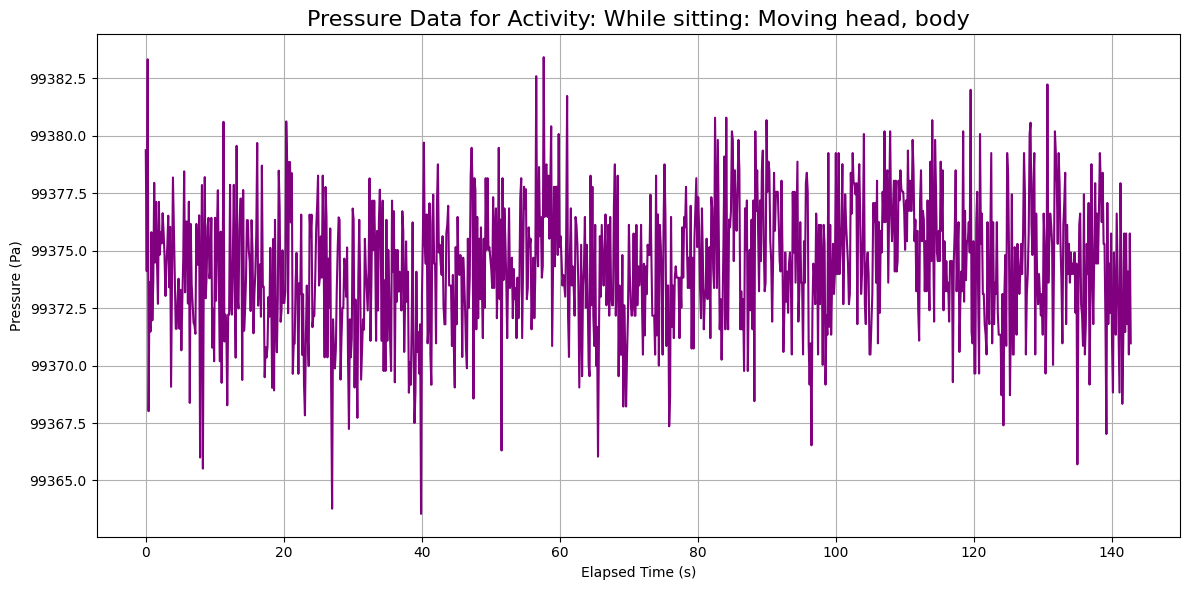

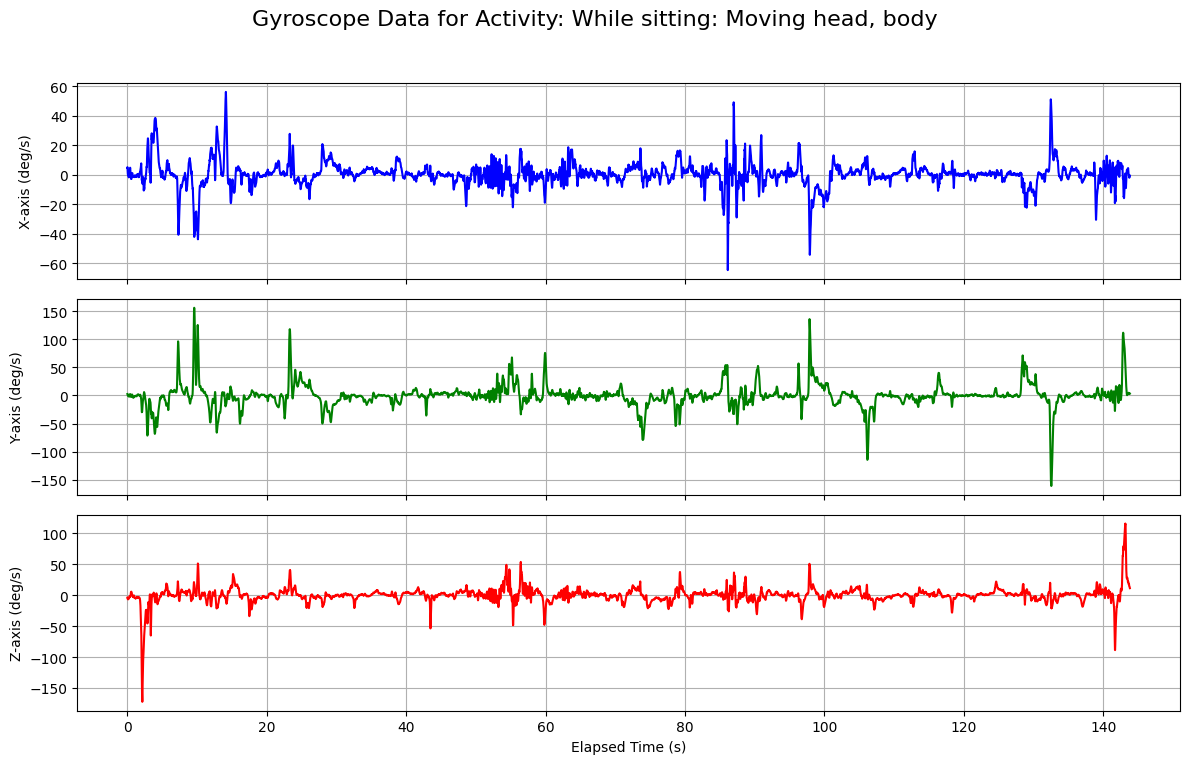

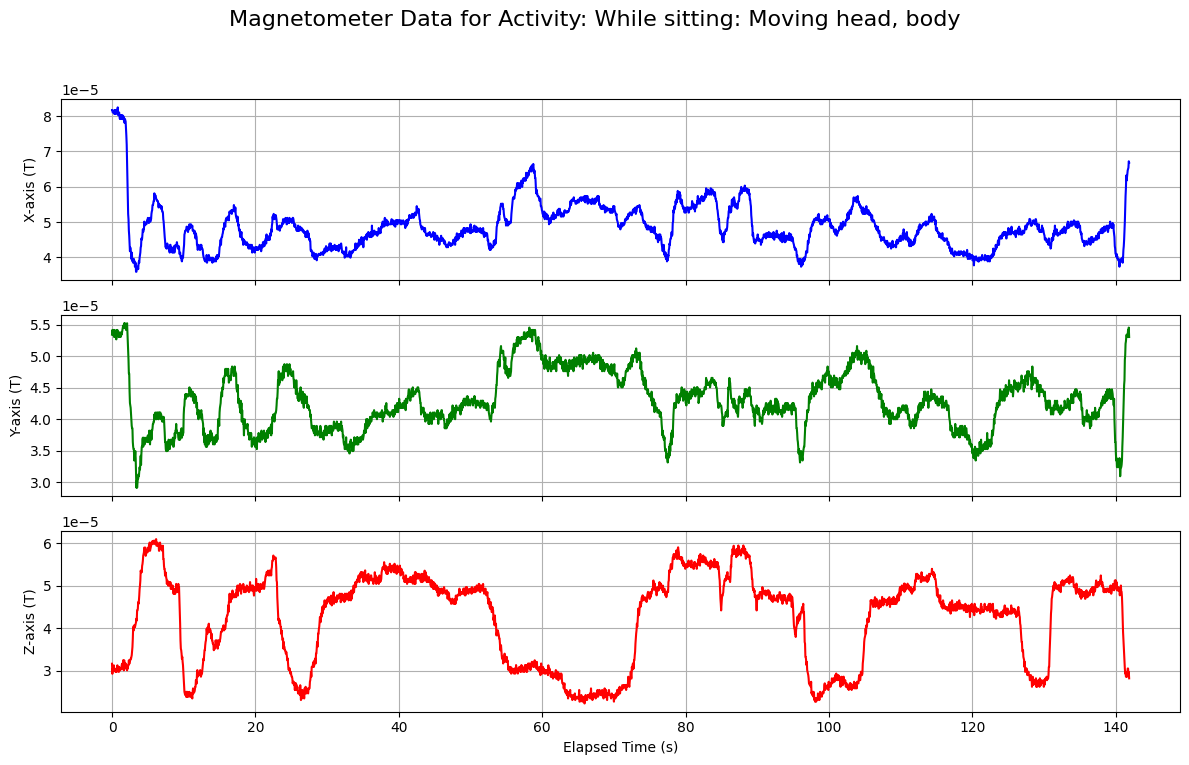

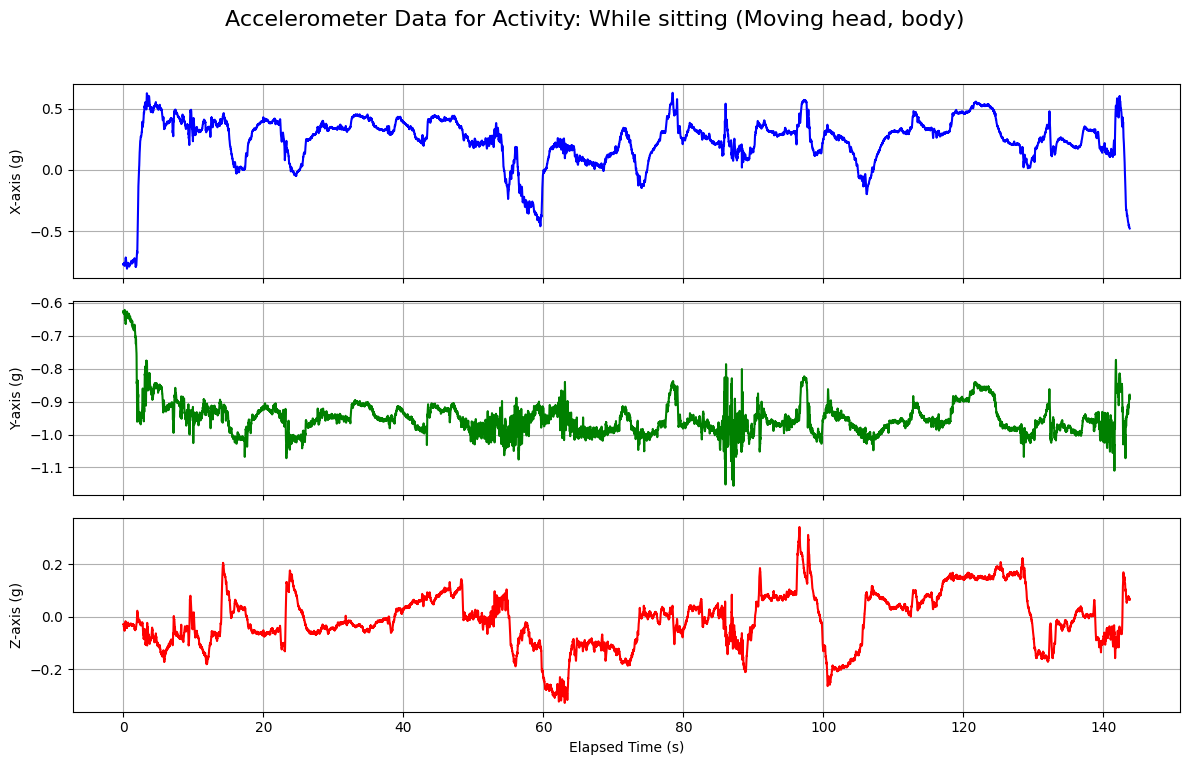

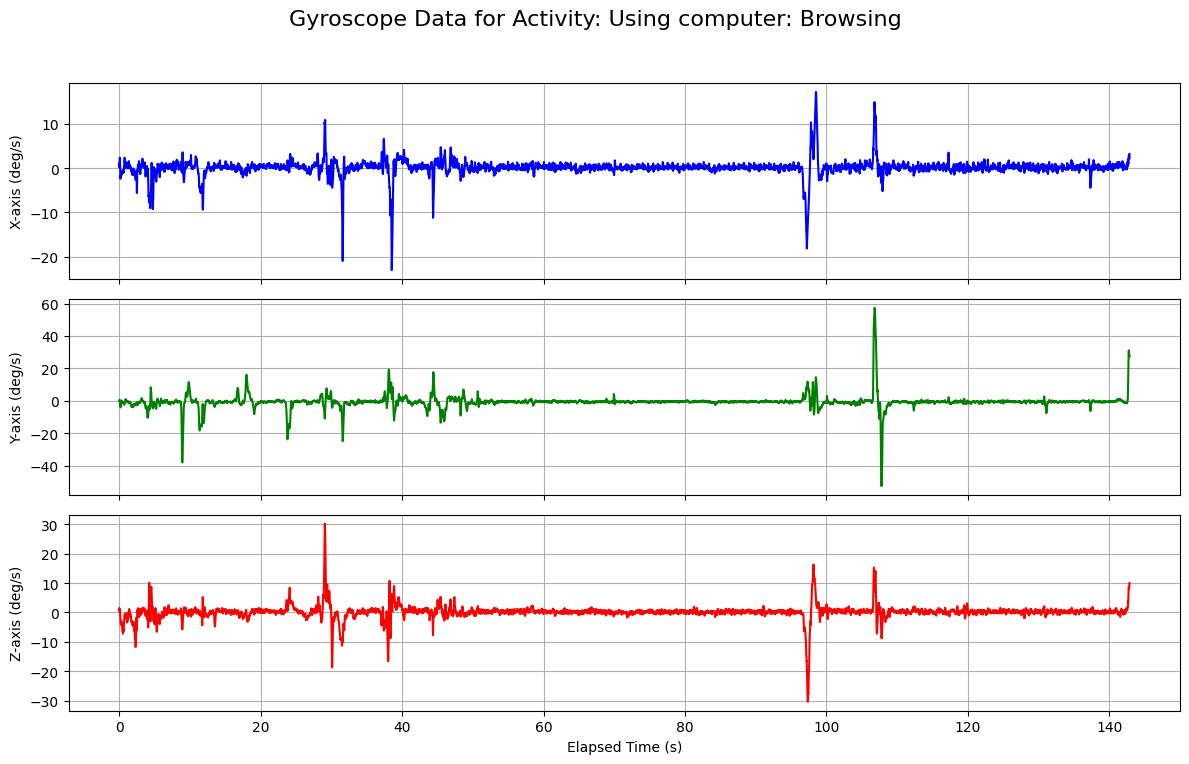

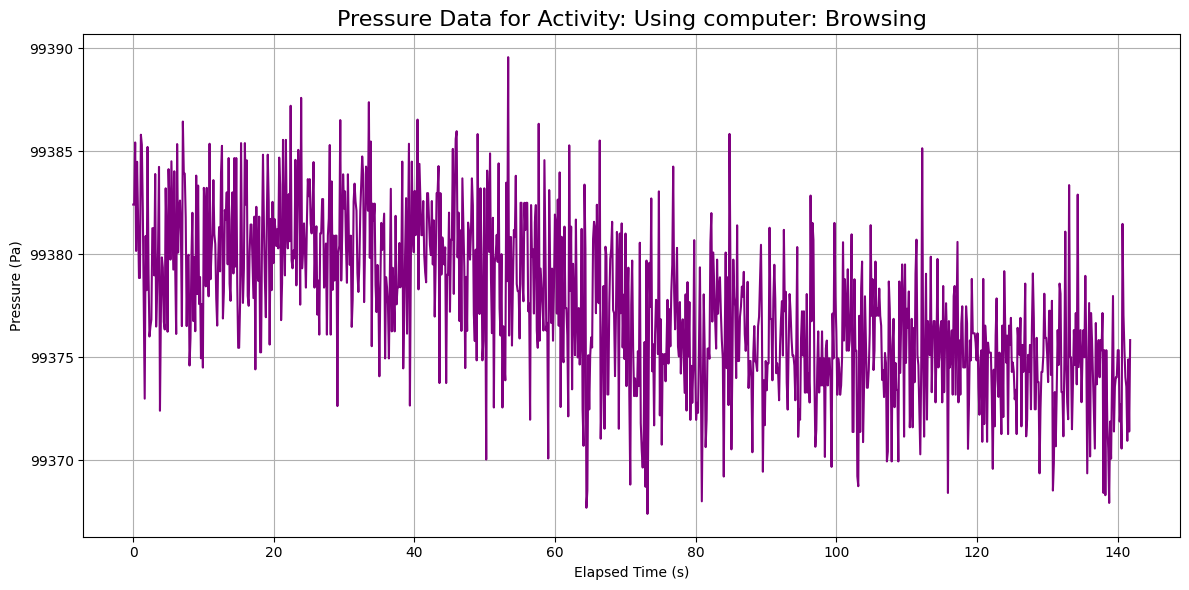

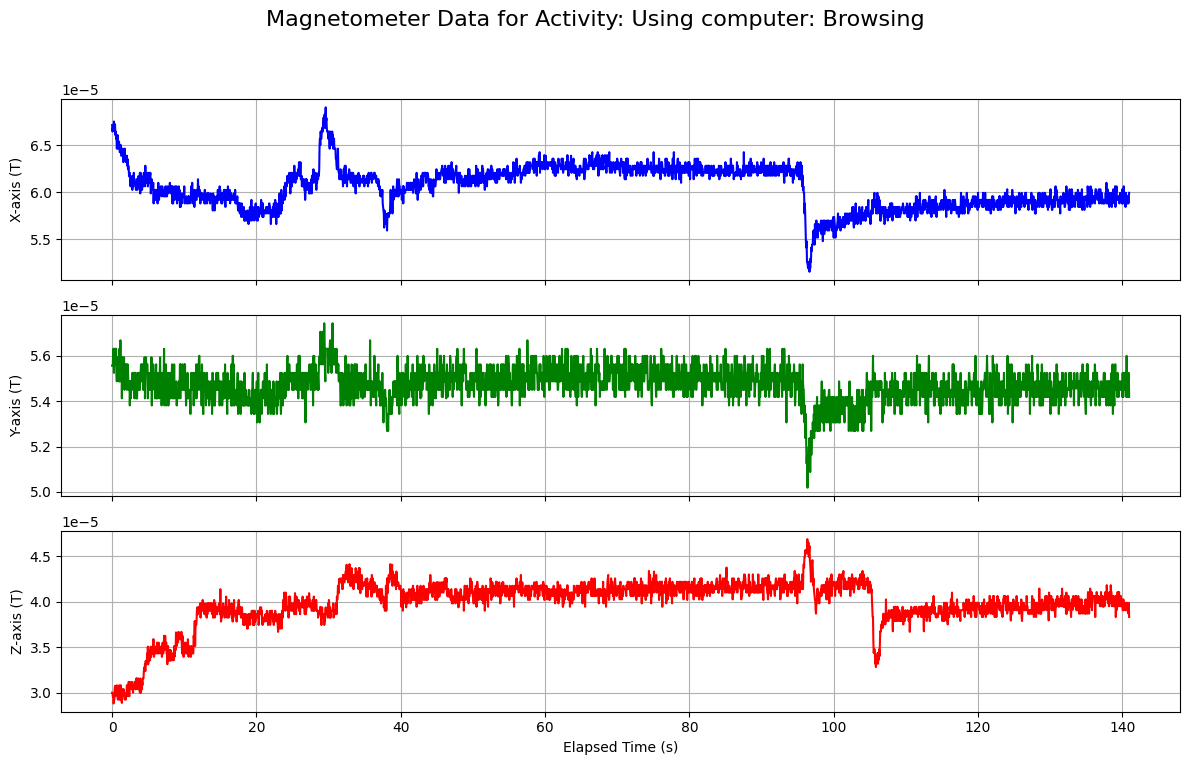

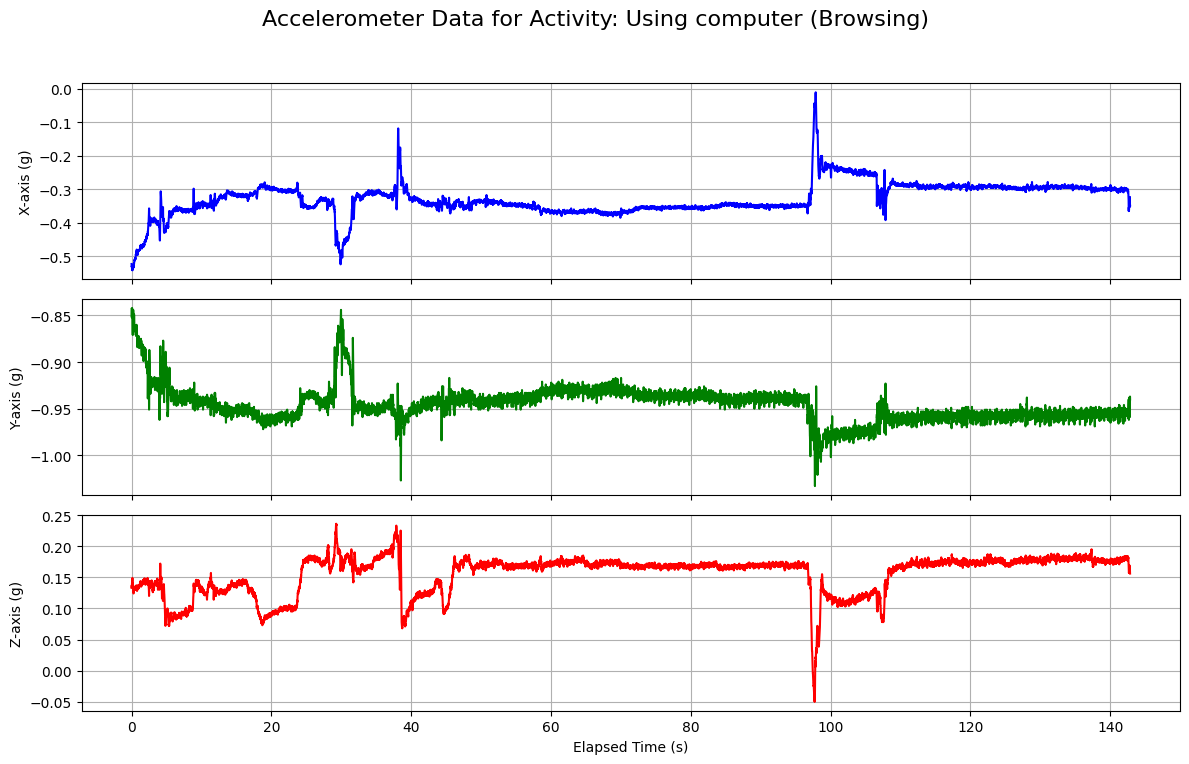

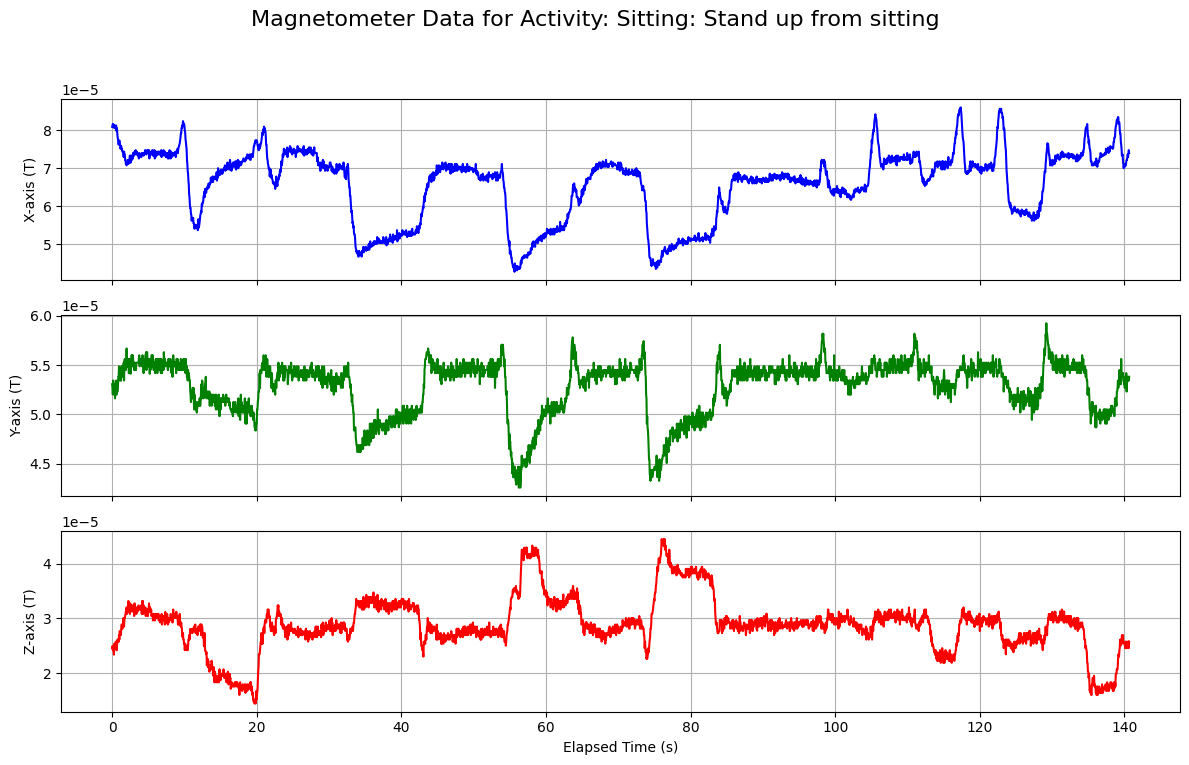

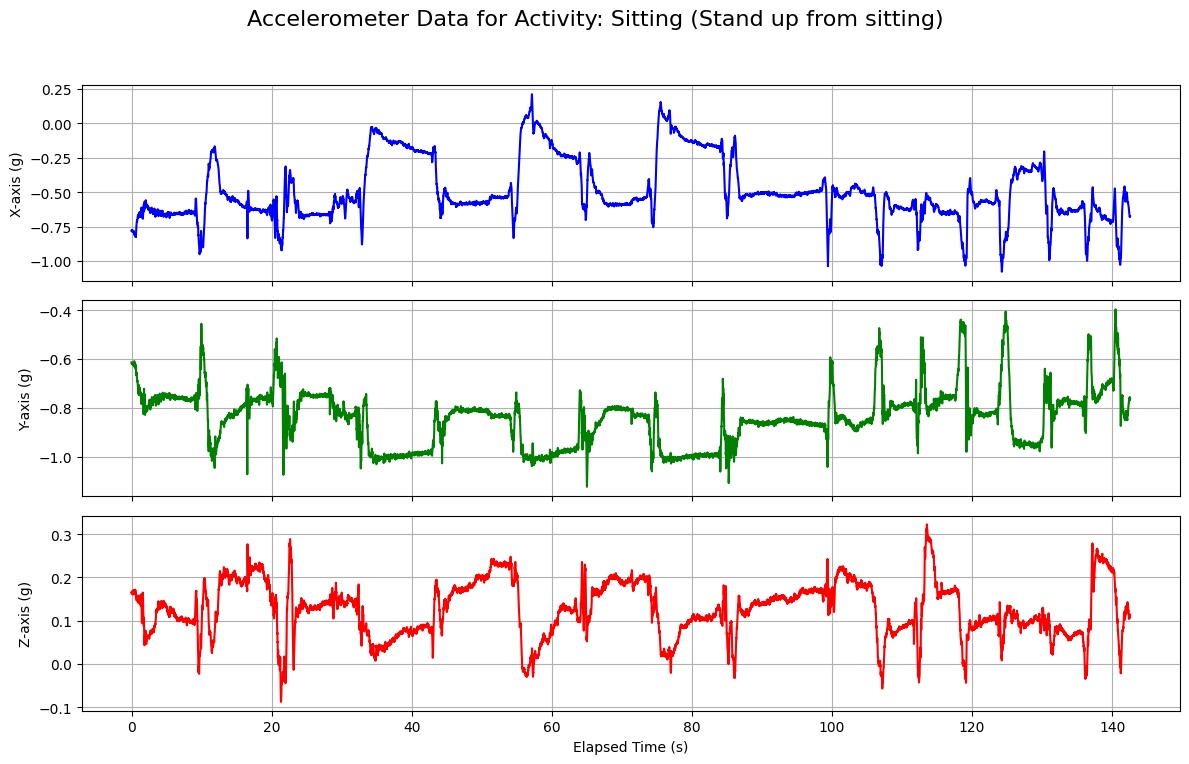

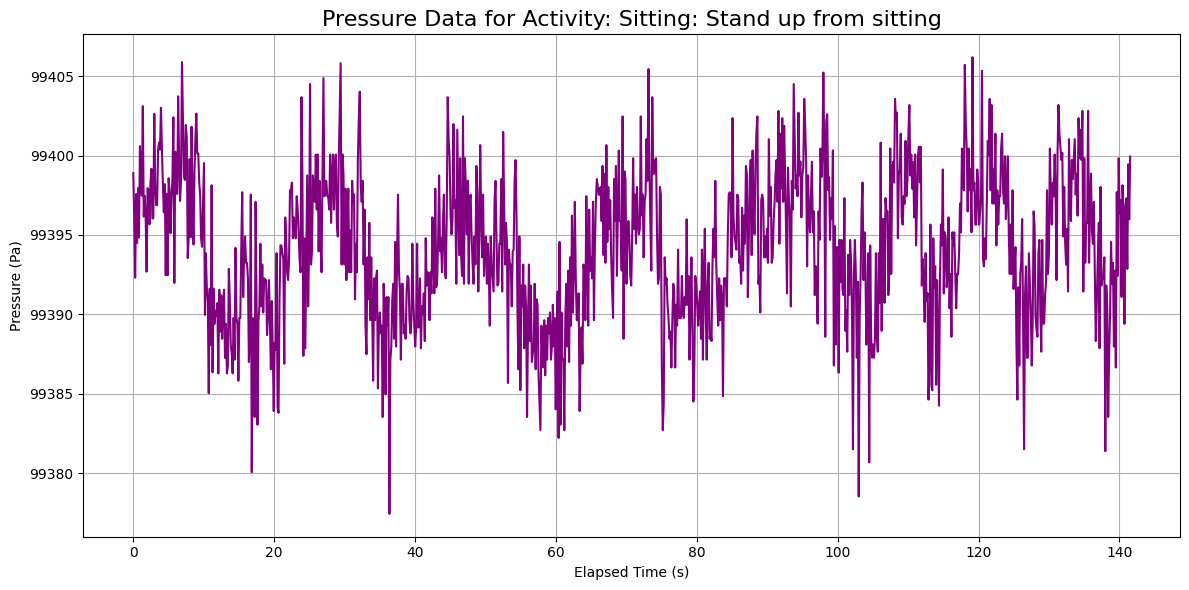

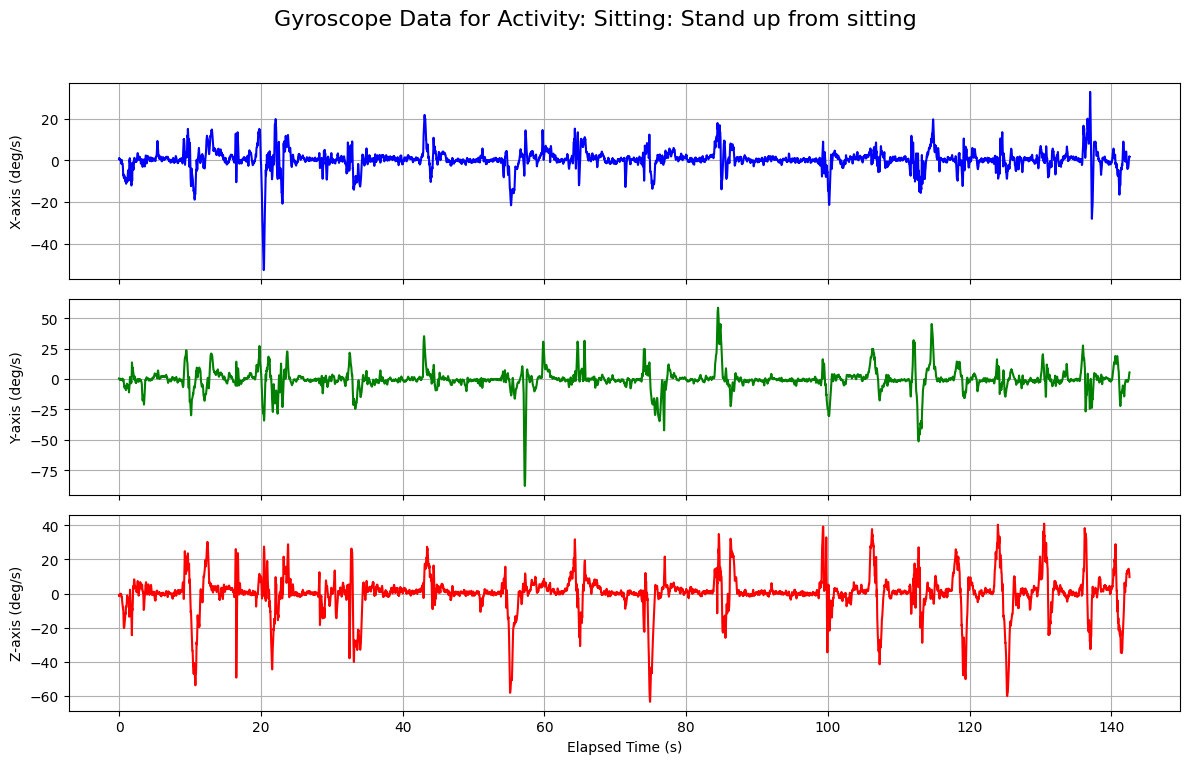

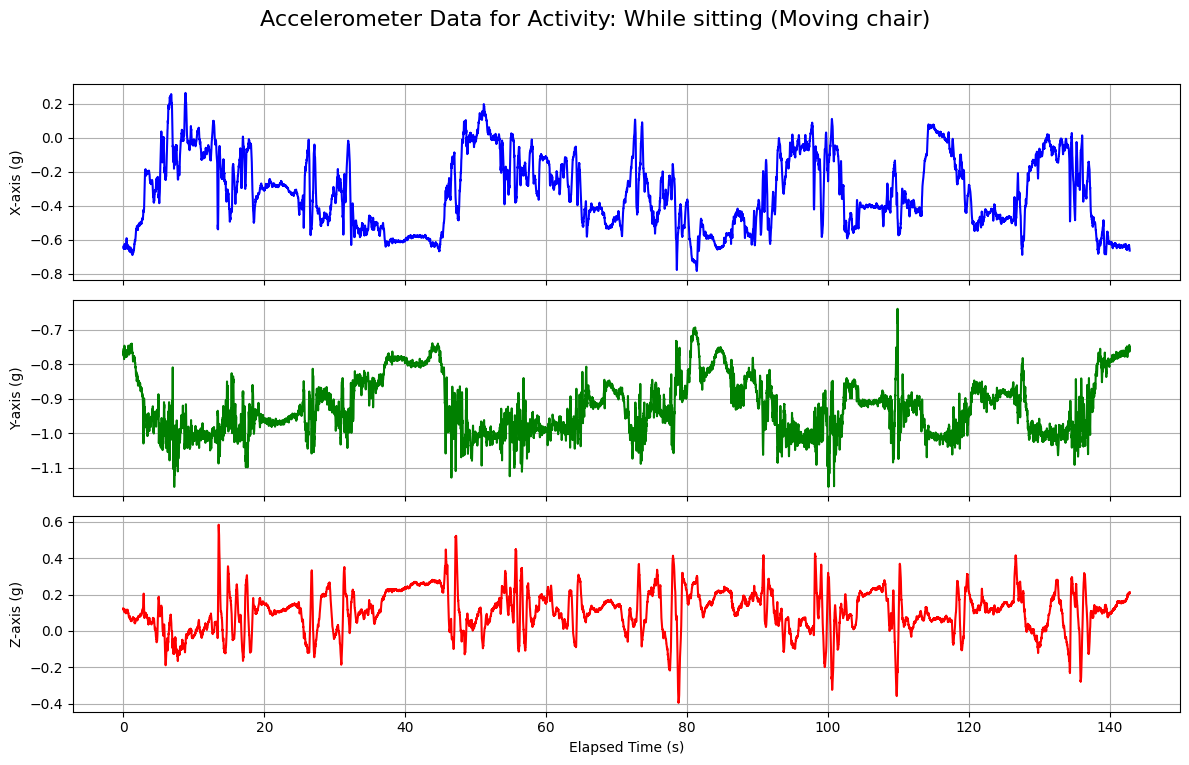

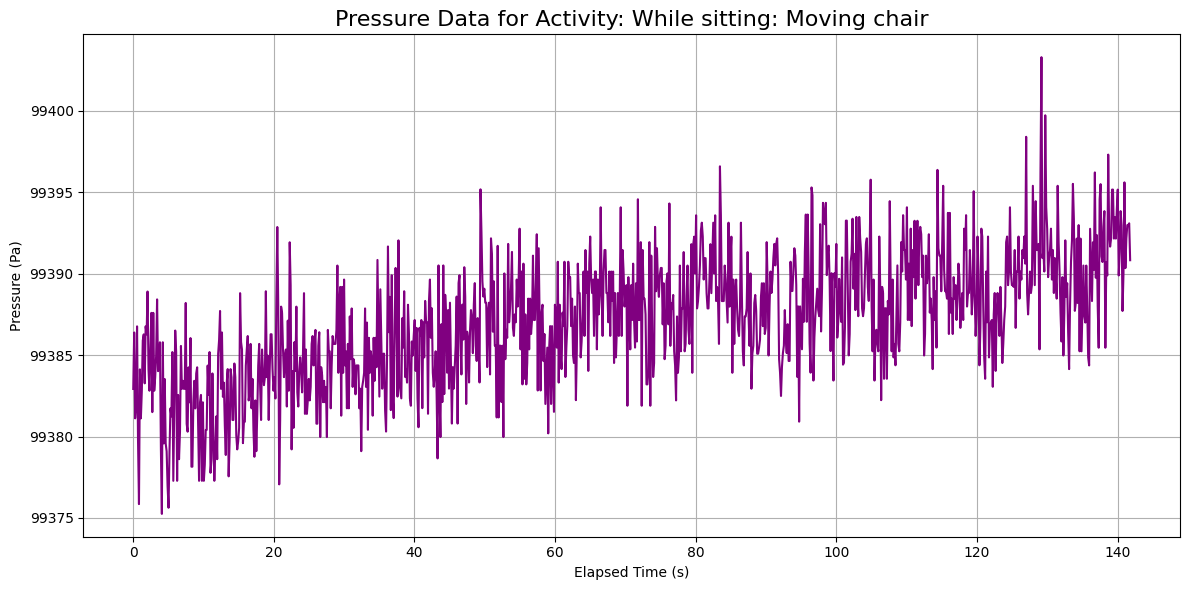

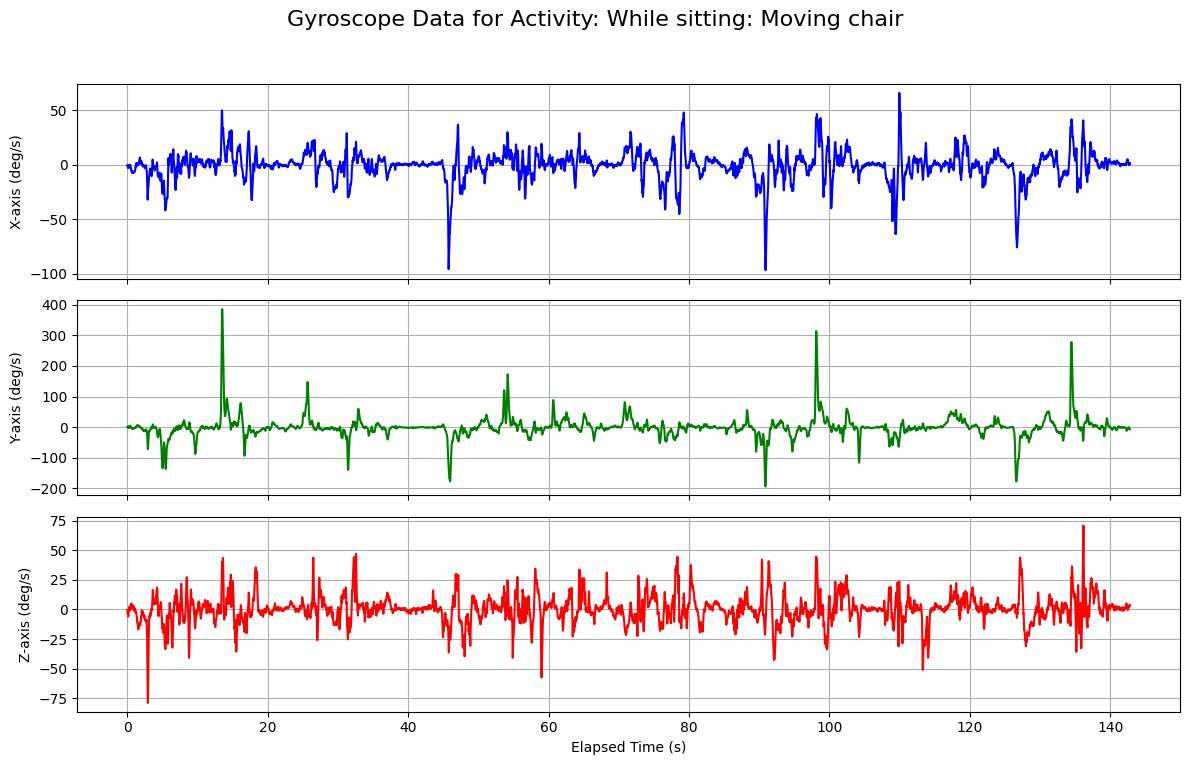

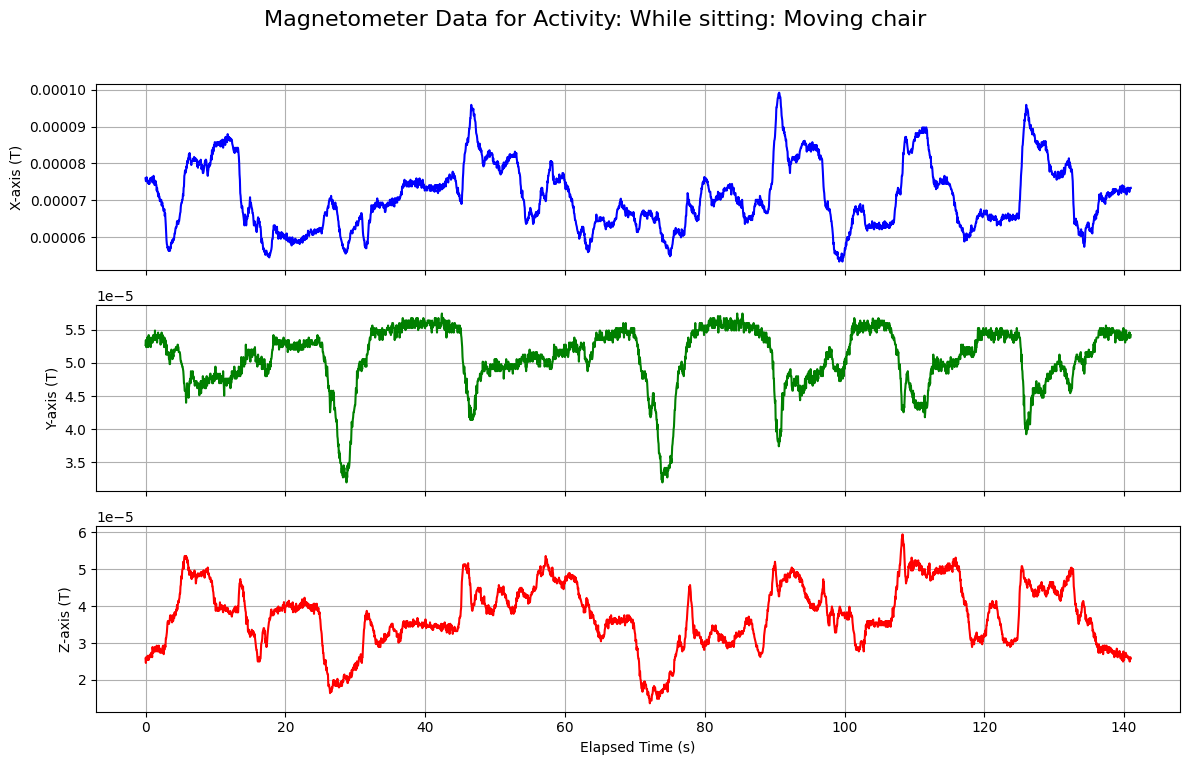

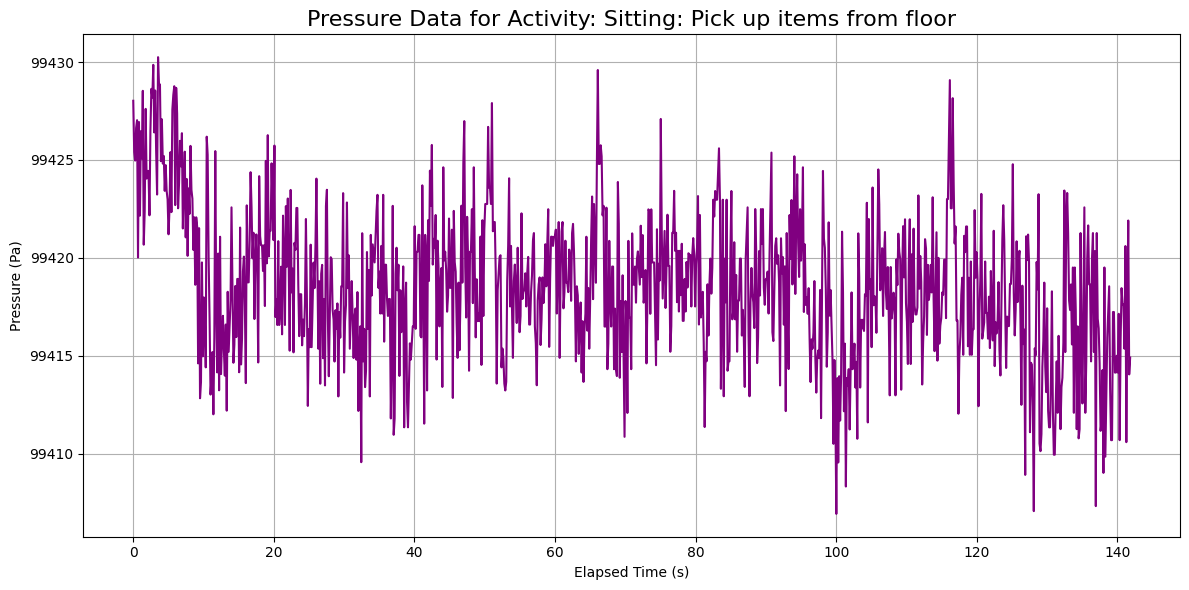

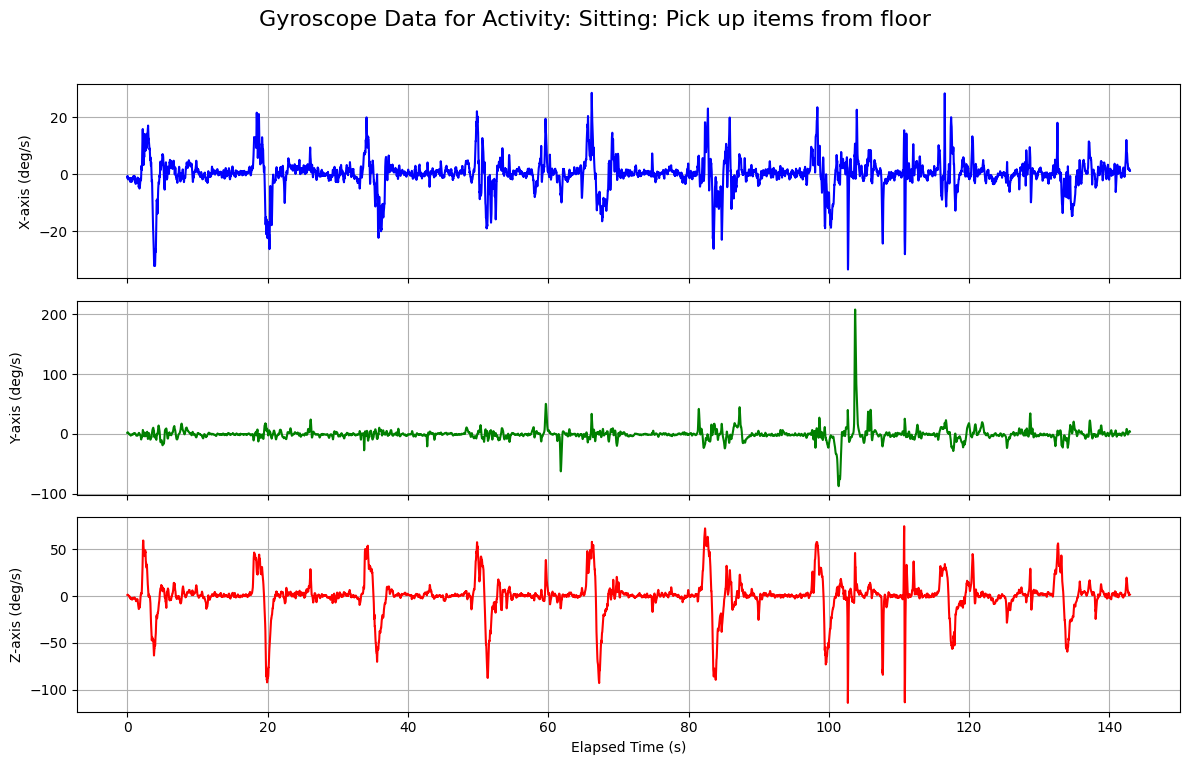

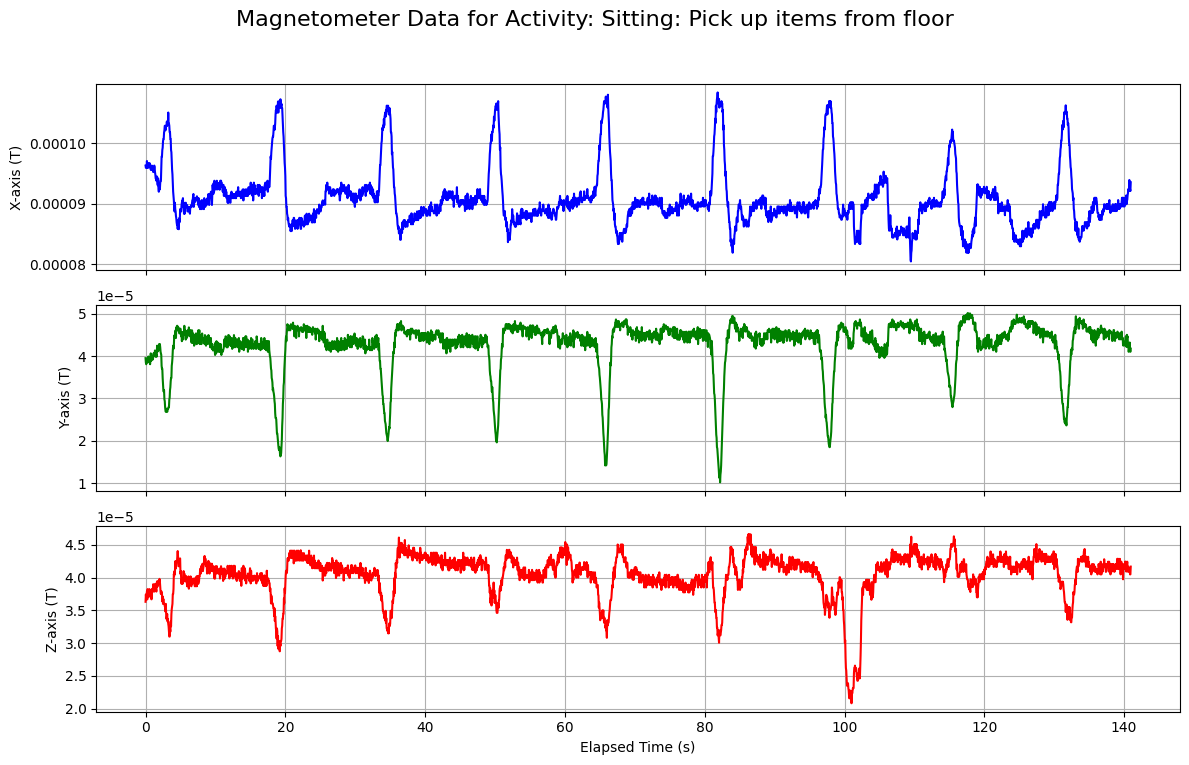

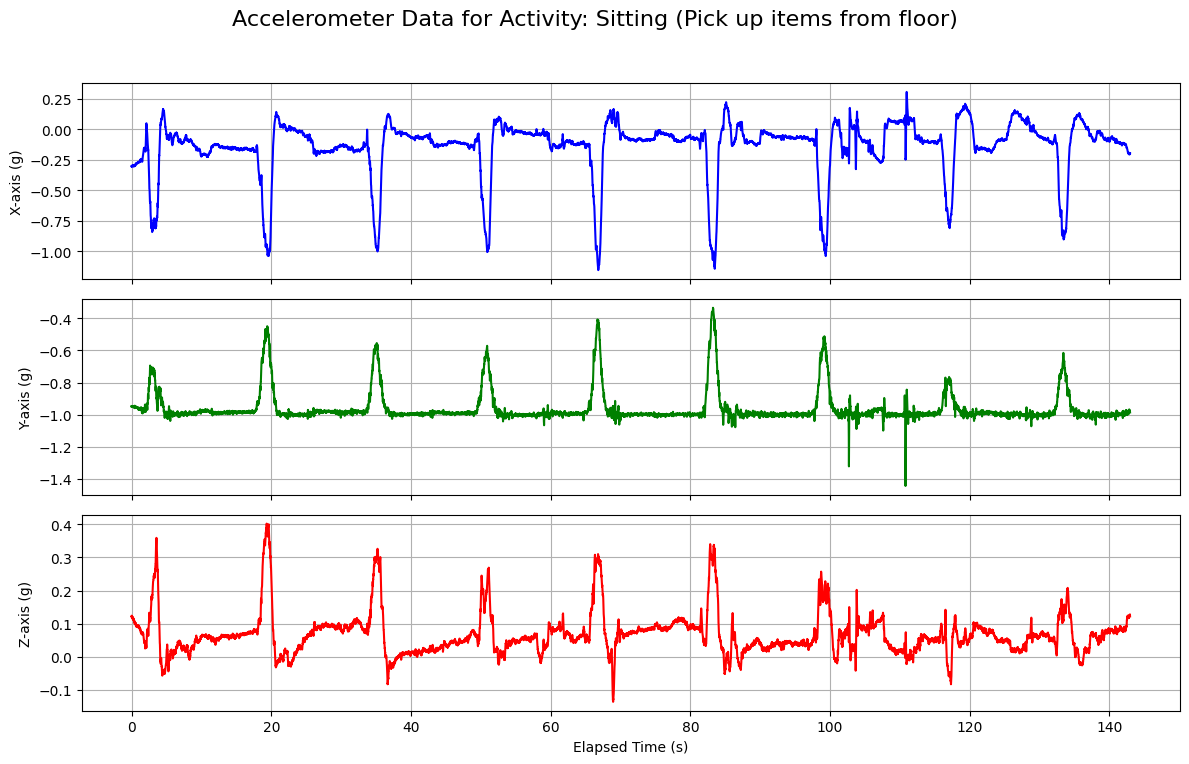

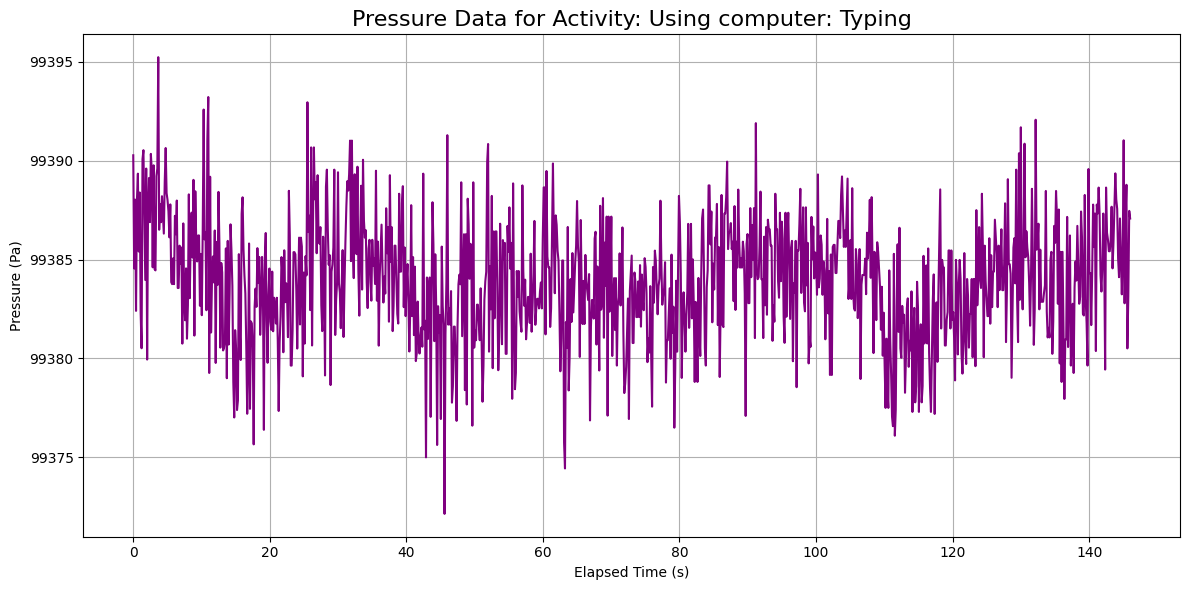

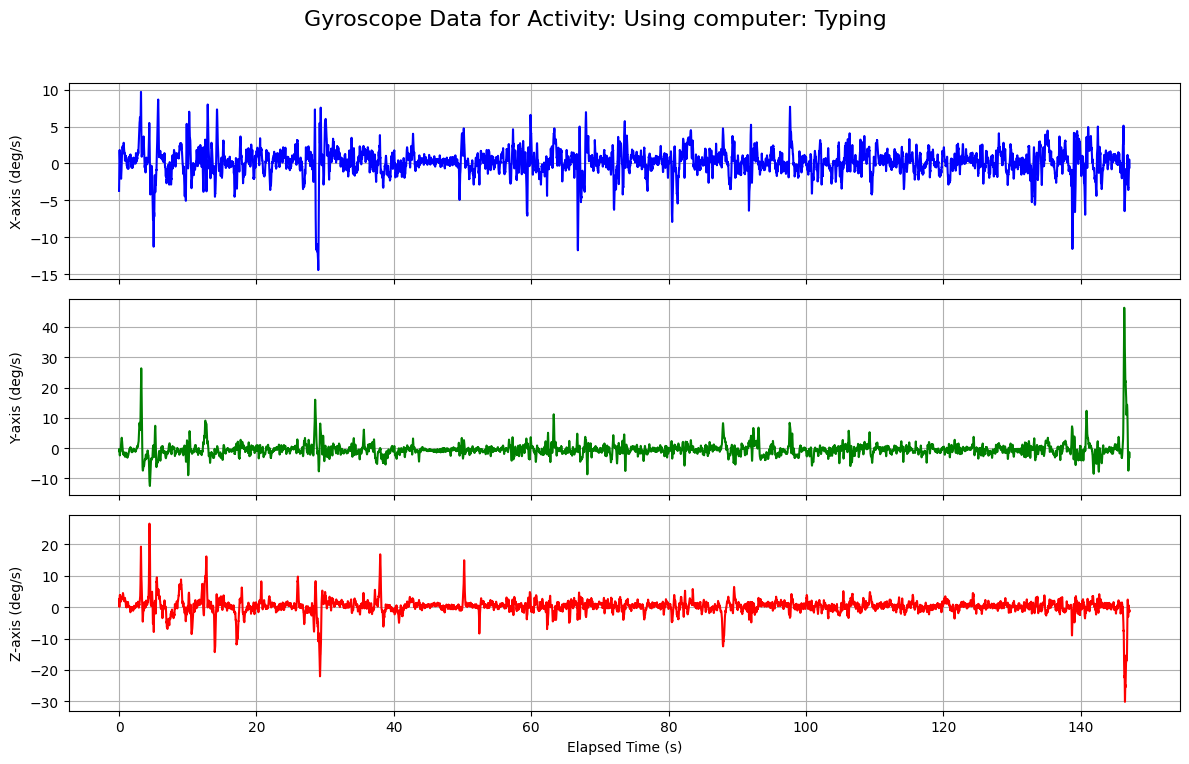

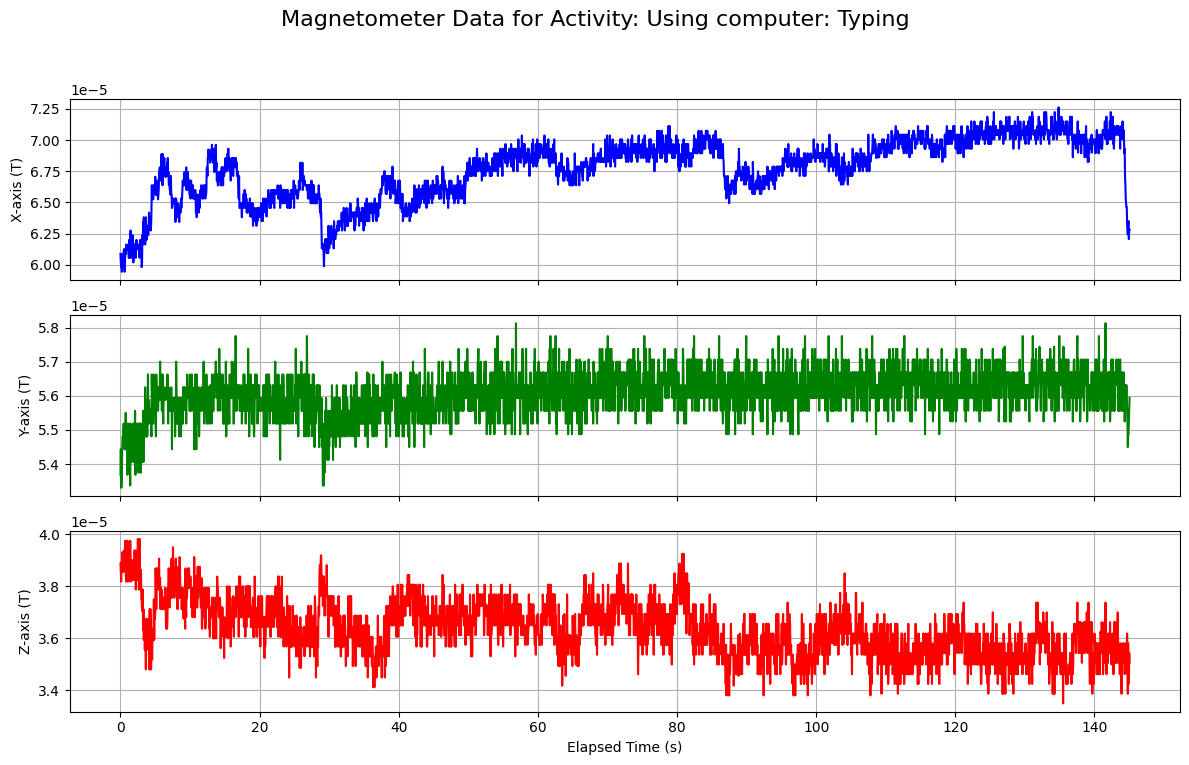

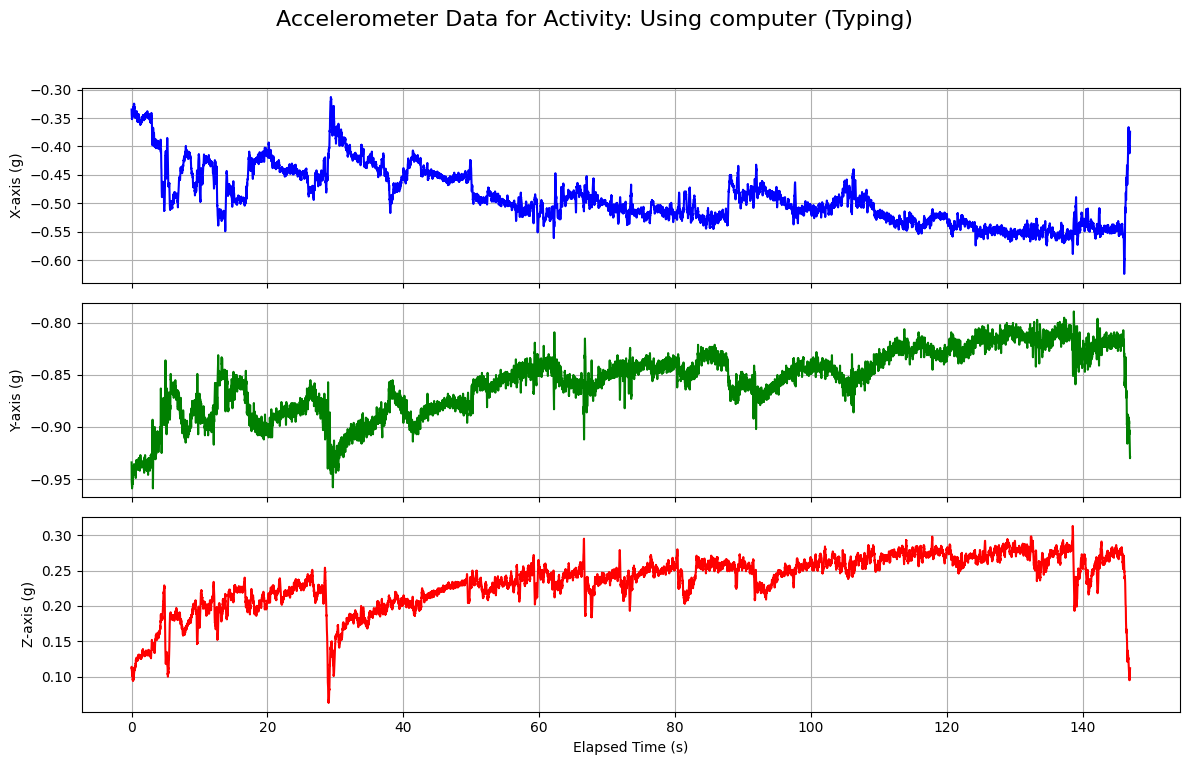

In [48]:
def visualize_accelerometer(user_id: str, file_name: str, activity_details):
    df = pd.read_csv(f'dataset/{user_id}/{file_name}')
    new_columns = {
        'x-axis (g)': 'x',
        'y-axis (g)': 'y',
        'z-axis (g)': 'z',
        'elapsed (s)': 'elapsed'
    }

    df = df.rename(columns=new_columns)

    fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
    fig.suptitle(f"Accelerometer Data for Activity: {activity_details['activity']} ({activity_details['details']})", fontsize=16)

    axes[0].plot(df['elapsed'], df['x'], color='blue')
    axes[0].set_ylabel('X-axis (g)')
    axes[0].grid(True)

    axes[1].plot(df['elapsed'], df['y'], color='green')
    axes[1].set_ylabel('Y-axis (g)')
    axes[1].grid(True)

    axes[2].plot(df['elapsed'], df['z'], color='red')
    axes[2].set_ylabel('Z-axis (g)')
    axes[2].set_xlabel('Elapsed Time (s)')
    axes[2].grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


def visualize_gyroscope(user_id: str, experiment_id: str, activity_details):
    df = pd.read_csv(f'dataset/{user_id}/{experiment_id}')
    
    new_columns = {
        'x-axis (deg/s)': 'x',
        'y-axis (deg/s)': 'y',
        'z-axis (deg/s)': 'z',
        'elapsed (s)': 'elapsed'
    }
    df = df.rename(columns=new_columns)

    fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
    fig.suptitle(f"Gyroscope Data for Activity: {activity_details['activity']}: {activity_details['details']}", fontsize=16)

    axes[0].plot(df['elapsed'], df['x'], color='blue')
    axes[0].set_ylabel('X-axis (deg/s)')
    axes[0].grid(True)

    axes[1].plot(df['elapsed'], df['y'], color='green')
    axes[1].set_ylabel('Y-axis (deg/s)')
    axes[1].grid(True)

    axes[2].plot(df['elapsed'], df['z'], color='red')
    axes[2].set_ylabel('Z-axis (deg/s)')
    axes[2].set_xlabel('Elapsed Time (s)')
    axes[2].grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


def visualize_pressure(user_id: str, experiment_id: str, activity_details):
    df = pd.read_csv(f'dataset/{user_id}/{experiment_id}')
    
    new_columns = {
        'pressure (Pa)': 'pressure',
        'elapsed (s)': 'elapsed'
    }
    df = df.rename(columns=new_columns)

    plt.figure(figsize=(12, 6))
    plt.plot(df['elapsed'], df['pressure'], color='purple')
    plt.title(f"Pressure Data for Activity: {activity_details['activity']}: {activity_details['details']}", fontsize=16)
    plt.xlabel('Elapsed Time (s)')
    plt.ylabel('Pressure (Pa)')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()


def visualize_magnetometer(user_id: str, experiment_id: str, activity_details):
    df = pd.read_csv(f'dataset/{user_id}/{experiment_id}')
    
    new_columns = {
        'x-axis (T)': 'x',
        'y-axis (T)': 'y',
        'z-axis (T)': 'z',
        'elapsed (s)': 'elapsed'
    }
    df = df.rename(columns=new_columns)

    fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
    fig.suptitle(f"Magnetometer Data for Activity: {activity_details['activity']}: {activity_details['details']}", fontsize=16)

    axes[0].plot(df['elapsed'], df['x'], color='blue')
    axes[0].set_ylabel('X-axis (T)')
    axes[0].grid(True)

    axes[1].plot(df['elapsed'], df['y'], color='green')
    axes[1].set_ylabel('Y-axis (T)')
    axes[1].grid(True)

    axes[2].plot(df['elapsed'], df['z'], color='red')
    axes[2].set_ylabel('Z-axis (T)')
    axes[2].set_xlabel('Elapsed Time (s)')
    axes[2].grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



def visualize_according_to_sensor(user_id, experiment_id, sensor_files):
    activity_id = get_activity_id_from_experiment_id(experiment_id)
    activity_details = get_activity_details_from_activity_id(f'{activity_id}')
    
    for sensor_type, file_name in sensor_files.items():
        if sensor_type  == 'accelerometer':
            visualize_accelerometer(user_id, file_name, activity_details)
        elif sensor_type == 'gyroscope':
            visualize_gyroscope(user_id, file_name, activity_details)
        elif sensor_type == 'pressure':
            visualize_pressure(user_id, file_name, activity_details)
        elif sensor_type == 'magnetometer':
            visualize_magnetometer(user_id, file_name, activity_details)

def create_plots(user_id: str):
    experiment_sensor_files = get_files_grouped_by_experiment(user_id)

    for experiment_id, files in experiment_sensor_files.items():
        visualize_according_to_sensor(user_id, experiment_id, files)

create_plots('User13')

In [ ]:
def get_processed_dataframe(user_ids: list):
    """
    This function reads all the user_ids and combines accelerometer and gyroscope sensor data
    into a single dataframe and returns it.
    """
    df = pd.DataFrame()

    for user_id in user_ids:
        experiment_files = get_files_grouped_by_experiment(user_id)

        for experiment_id, files in experiment_files.items():
            activity_id = get_activity_id_from_experiment_id(experiment_id)

            if files.get("accelerometer") == None or files.get("gyroscope") == None:
                continue
            
            accelerometer_fname = f'dataset/{user_id}/{files["accelerometer"]}'
            gyroscope_fname = f'dataset/{user_id}/{files["gyroscope"]}'

            # Read the accelerometer and gyroscope CSV files
            accelerometer_csv = pd.read_csv(accelerometer_fname)
            gyroscope_csv = pd.read_csv(gyroscope_fname)


            # Add suffixes to column names to differentiate between the two DataFrames
            accelerometer_csv = accelerometer_csv.add_suffix('_accelerometer')
            gyroscope_csv = gyroscope_csv.add_suffix('_gyroscope')

            # Concatenate both DataFrames along columns (assumes indices align)
            combined_df = pd.concat([accelerometer_csv, gyroscope_csv], axis=1)

            # Add the activity_id to the combined DataFrame
            combined_df["activity_id"] = activity_id

            # Append the combined DataFrame to the main DataFrame
            df = pd.concat([df, combined_df], ignore_index=True)

    return df

In [21]:
user_ids = list_folders_in_directory("dataset")
df = get_processed_dataframe(user_ids)
df.head()

epoch (ms)_accelerometer time (-13:00)_accelerometer  \
0              1.604763e+12     2020-11-07T10:25:23.097   
1              1.604763e+12     2020-11-07T10:25:23.107   
2              1.604763e+12     2020-11-07T10:25:23.117   
3              1.604763e+12     2020-11-07T10:25:23.127   
4              1.604763e+12     2020-11-07T10:25:23.137   

   elapsed (s)_accelerometer  x-axis (g)_accelerometer  \
0                       0.00                    -0.280   
1                       0.01                    -0.287   
2                       0.02                    -0.288   
3                       0.03                    -0.284   
4                       0.04                    -0.289   

   y-axis (g)_accelerometer  z-axis (g)_accelerometer  epoch (ms)_gyroscope  \
0                     0.799                    -0.490          1.604763e+12   
1                     0.813                    -0.497          1.604763e+12   
2                     0.805                    -0.489          1.604763e+12   
3                     0.800                    -0.482          1.604763e+12   
4                     0.804                    -0.489          1.604763e+12   

   time (-13:00)_gyroscope  elapsed (s)_gyroscope  x-axis (deg/s)_gyroscope  \
0  2020-11-07T10:25:23.109                   0.00                     0.976   
1  2020-11-07T10:25:23.119                   0.01                     1.524   
2  2020-11-07T10:25:23.129                   0.02                     0.488   
3  2020-11-07T10:25:23.139                   0.03                    -0.061   
4  2020-11-07T10:25:23.149                   0.04                     1.220   

   y-axis (deg/s)_gyroscope  z-axis (deg/s)_gyroscope  activity_id  
0                    -6.280                    -3.171            5  
1                    -6.402                    -3.659            5  
2                    -6.768                    -4.695            5  
3                    -7.500                    -5.915            5  
4                    -7.744                    -6.646            5

In [22]:
len(df)

2951820